# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

 Content has grown to a point where it is overwhelming, this is done to help pair user with likes/basically not innudate them with choices/analysis paralysis

### **The objective:**

 - Ultimate goal is to always reduce user platform attrition, but let's just isolate it to helping them find stuff they like so they're more likely to use the platform and stay.

### **The key questions:**

- What are the key questions that need to be answered?
typical user behavior
atypical patterns in user behavior

### **The problem formulation**:

- What is it that we are trying to solve using data science?
predict my  next song, what is the best modelrecommender algorithm to use?

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

- song_id - A unique id given to every song
- title - Title of the song
- Release - Name of the released album
- Artist_name - Name of the artist
- year - Year of release

**count_data**

- user _id - A unique id given to the user
- song_id - A unique id given to the song
- play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

Currently using bumerged and df_trimmed , df_trimmed is the main unaltered data set, bu_merged has the spotify data. I want to apply the genre stuff and gotta move on through the rest before hte mentored learning session.

**Assumptions to Check and Correct - your math wont math without it**

Data Assumptions:

**Sparsity** : Collaborative filtering assumes that users have interacted with a small subset of available items. Ensure that your dataset is large enough and has a sufficient number of interactions.
Cold Start Problem: New users or new songs with insufficient interaction data can be problematic. Consider hybrid approaches to handle this.


User Behavior Assumptions:


**Stationarity**: Assumes user preferences and song characteristics remain relatively constant over time. If preferences change significantly, adapt your model to handle evolving tastes.
Algorithm Assumptions:

**User Similarity**: Collaborative filtering often assumes users who are similar will have similar preferences. Verify this assumption by analyzing user behavior and similarity metrics.

**Item Similarity**: Content-based filtering assumes that items with similar features will be preferred similarly by users. Ensure that the features used are meaningful and relevant.
**Scalability:**
Model Complexity: Ensure that your chosen model can handle the size of your dataset efficiently. For large datasets, consider using scalable algorithms and tools.

Handling Non-Stationarity in Recommendation Systems
Given that the dataset spans from 1965 onwards, it's essential to consider non-stationarity due to changes in musical trends and user preferences over decades. Here are some strategies to manage non-stationarity:

**1. Trend Analysis and Feature Engineering:

Temporal Features: Include temporal features in the model, such as the decade or year of release. This can help capture trends and shifts in music preferences over time.
Contextual Features: Consider adding features related to historical and cultural context (e.g., popular music genres in different eras) to improve recommendations.
**2. Adaptive Models:

Dynamic Models: Use models that adapt to changing preferences. For example, weighted approaches where recent interactions are given more importance than older ones can help reflect current user preferences.
Online Learning: Implement online learning algorithms that update the model incrementally as new data arrives. This allows the system to adapt to new trends and changes in user behavior.
**3. Segmentation:

Temporal Segmentation: Segment data by time periods (e.g., 1965-1980, 1981-2000, 2001-present) and build separate models for each segment. This approach can help capture different trends and preferences in distinct periods.
User Segmentation: Segment users based on their activity periods or preference changes. Tailor recommendations based on the segmented user profiles.
**4. Hybrid Models:

Combine Approaches: Use a hybrid model that incorporates both collaborative and content-based filtering. This can help balance historical preferences with current trends.
Blending Algorithms: Combine traditional recommendation algorithms with time-aware models to account for changes over time.
**5. Evaluation and Monitoring:

Monitor Performance: Regularly evaluate the performance of your recommendation system to ensure it adapts well to changing user preferences and trends.
Feedback Mechanisms: Incorporate user feedback to identify shifts in preferences and update the system accordingly.

Practical Implementation
**1. Time-Aware Metrics: Evaluate your recommendation system using time-aware metrics to ensure it captures evolving preferences and trends effectively.

**2. Update Frequency: Decide how often you should update your model based on the rate of change in user preferences and trends. Frequent updates may be necessary for highly dynamic environments.

In summary, managing stationarity is crucial when dealing with long-term datasets, such as one spanning several decades. By incorporating strategies to handle non-stationarity, you can build a recommendation system that remains relevant and effective over time.

### **Importing Libraries and the Dataset**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Used to ignore the warning given as output of the code
import warnings                                 # Used to ignore the warning given as output of the code
warnings.filterwarnings('ignore')


# Basic libraries of python for numeric and dataframe computations
import numpy as np                              # Basic libraries of python for numeric and dataframe computations
import pandas as pd

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt                 # Basic library for data visualization
# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns                           # Slightly advanced library for data visualization

# Import the required library to compute the cosine similarity between two vectors
# For implementing similarity-based recommendation system
!pip install surprise
from surprise.prediction_algorithms.knns import KNNBasic
# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict             # A dictionary output that does not raise a key error
# Impoort mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error  # A performance metrics in sklearn



### **Load the dataset**

In [ ]:
# Importing the datasets
count = pd.read_csv('/content/drive/MyDrive/count_data.csv')


In [ ]:
# Importing the datasets
songs = pd.read_csv('/content/drive/MyDrive/song_data.csv')

### **Understanding the data by viewing a few observations**

In [ ]:
# Display first 10 records of count_df data
count.head(10)

In [ ]:
count.shape


(2000000, 4)

In [ ]:
# Display first 10 records of song_df data
songs.head(10)

In [ ]:
songs.shape

(1000000, 5)

### **Let us check the data types and and missing values of each column**

In [ ]:
# Display info of count_df
count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
# Display info of song_df
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:_____________**
Huge.
For both data sets, the ID columns rae stored as objects. Count data is granular to the user, but has song_id that we can use to join to the songs table (granular to song_id). Expecting 7 inal columns. Data set will be huge, the structure expected is one to many from songs to count.

The counts dataset contains an unname index that can probably be dropped; otherwise, with the exception of songs.year, all variables across both data sets are stored as objects.

Year... I should probably drop it to assume stationarity, but we have so few features currently that Im unwilling to drop it. Im attached to any and all data. Im gonna try to tag the decades and impute genre.

YEars = 0 ?
Missing ~27 titles and releases...

In [ ]:
# Left merge count_df and song_df on "song_id". Drop duplicates from song_df data simultaneously
df = pd.merge(count, songs, on = 'song_id', how = 'left')
# Drop the column 'Unnamed: 0'
df = df.drop('Unnamed: 0', axis = 1)
## Name the obtained dataframe as "df"
dfcopiessongs = df.copy(deep = True)
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfcopiessongs['user_id'] = le.fit_transform(dfcopiessongs['user_id'])
dfcopiessongs['song_id'] = le.fit_transform(dfcopiessongs['song_id'])
dfcopiessongs.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,736,1,Stronger,Graduation,Kanye West,2007
4,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005


In [ ]:
# Filter the data for user_id 3237
user_data = dfcopiessongs[dfcopiessongs['user_id'] == 3237]
user_data.head(100)
# Sort the filtered data by play_count in descending order
sorted_user_data = user_data.sort_values(by='play_count', ascending=False)
print(sorted_user_data)
# Get the most popular song
most_popular_song = sorted_user_data.head(1)

print(most_popular_song[['song_id', 'title', 'play_count', 'artist_name']])

         user_id  song_id  play_count  \
1695646     3237     2220         157   
1695598     3237      605         156   
1695778     3237     7103         156   
1695805     3237     7796         155   
1695806     3237     7796         155   
...          ...      ...         ...   
1695852     3237     8915           1   
1695811     3237     7885           1   
1695744     3237     5901           1   
1695743     3237     5888           1   
1695745     3237     5916           1   

                                                   title  \
1695646                                    Sehr kosmisch   
1695598                            Lucky (Album Version)   
1695778                                        Alejandro   
1695805                                       Love Story   
1695806                                       Love Story   
...                                                  ...   
1695852                                     It's My Life   
1695811                    

Ok, so im seing we might want to drop release and just roll up title and artist name before we test for duplicates and remove...

In [ ]:

# Identify duplicates across all columns
duplicates = dfcopiessongs[dfcopiessongs.duplicated(keep=False)]

print("Duplicate rows across all columns:")
print(duplicates)

Duplicate rows across all columns:
         user_id  song_id  play_count                                  title  \
2          54961      736           1                               Stronger   
3          54961      736           1                               Stronger   
86         22570     8268           5                           Just Lose It   
87         22570     8268           5                           Just Lose It   
163        54498     4626           2            The Prime Time Of Your Life   
...          ...      ...         ...                                    ...   
2086769    18801     9530           7  Mona Lisa (When The World Comes Down)   
2086835    46130     5291           4                       Bring Me To Life   
2086836    46130     5291           4                       Bring Me To Life   
2086872    11660     4072           1                                Whisper   
2086873    11660     4072           1                                Whisper   

    

duplicated(keep=False): Identifies all rows that are duplicates across all columns.
drop_duplicates(keep='first'): Removes duplicate rows while keeping the first occurrence.
drop_duplicates(keep='last'): Keeps the last occurrence of duplicates.
drop_duplicates(keep=False): Removes all duplicates, keeping only unique rows.

In [ ]:
# Remove duplicate rows, keeping the first occurrence
dfcopiessongs = dfcopiessongs.drop_duplicates(keep='first')

# Optionally, if you want to keep the last occurrence instead
# df_no_duplicates = dfcopiessongs.drop_duplicates(keep='last')

# Optionally, if you want to remove all duplicates and keep only unique rows
# df_no_duplicates = dfcopiessongs.drop_duplicates(keep=False)

print("DataFrame after removing duplicates:")
print(dfcopiessongs)

DataFrame after removing duplicates:
         user_id  song_id  play_count                           title  \
0          54961      153           1                        The Cove   
1          54961      413           2                 Entre Dos Aguas   
2          54961      736           1                        Stronger   
4          54961      750           1                  Constellations   
5          54961     1188           1                    Learn To Fly   
...          ...      ...         ...                             ...   
2086941    64590     3660           2       Ignorance (Album Version)   
2086942    64590     3736           4          Two Is Better Than One   
2086943    64590     3744           3  What I've Done (Album Version)   
2086944    64590     3893           1                              Up   
2086945    64590     3963           1      Soil_ Soil (Album Version)   

                               release  \
0                   Thicker Than Water   
1 

In [ ]:
# Filter the data for user_id 3237
user_data = dfcopiessongs[dfcopiessongs['user_id'] == 3237]
user_data.head(100)
# Sort the filtered data by play_count in descending order
sorted_user_data = user_data.sort_values(by='play_count', ascending=False)
print(sorted_user_data)
# Get the most popular song
most_popular_song = sorted_user_data.head(1)

print(most_popular_song[['song_id', 'title', 'play_count', 'artist_name']])

         user_id  song_id  play_count                                 title  \
1695646     3237     2220         157                         Sehr kosmisch   
1695598     3237      605         156                 Lucky (Album Version)   
1695778     3237     7103         156                             Alejandro   
1695805     3237     7796         155                            Love Story   
1695806     3237     7796         155                            Love Story   
...          ...      ...         ...                                   ...   
1695852     3237     8915           1                          It's My Life   
1695770     3237     6632           1  Aghia Sophia (2008 Digital Remaster)   
1695701     3237     4377           1                        Psychotic Girl   
1695773     3237     6726           1                    If I Ain't Got You   
1695723     3237     5023           1                           In My Place   

                                                   

**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [ ]:
data = dfcopiessongs.copy(deep = True)

In [ ]:
# Get the column containing the users
users = data.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

In [ ]:
# We want our users to have listened at least 90 songs
SONG_COUNT_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

data = data.loc[ ~ data.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = data.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

In [ ]:
# We want our song to be listened by atleast 120 users to be considred
LISTENER_COUNT_CUTOFF = 120

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

data = data.loc[ ~ data.song_id.isin(remove_songs)]

checking that the test record id I need later is in the data frame:

In [ ]:
# Filter the data for user_id 3237
user_data = data[data['user_id'] == 3237]
user_data.head(100)
# Sort the filtered data by play_count in descending order
sorted_user_data = user_data.sort_values(by='play_count', ascending=False)
print(sorted_user_data)
# Get the most popular song
most_popular_song = sorted_user_data.head(1)

print(most_popular_song[['song_id', 'title', 'play_count', 'artist_name']])

         user_id  song_id  play_count                              title  \
1695646     3237     2220         157                      Sehr kosmisch   
1695598     3237      605         156              Lucky (Album Version)   
1695778     3237     7103         156                          Alejandro   
1695806     3237     7796         155                         Love Story   
1695805     3237     7796         155                         Love Story   
...          ...      ...         ...                                ...   
1695803     3237     7789           1  BedRock (Radio Edit) (feat.Lloyd)   
1695611     3237     1141           1                        Basic Space   
1695808     3237     7878           1                        Don't Panic   
1695810     3237     7881           1              My Boy Builds Coffins   
1695773     3237     6726           1                 If I Ain't Got You   

                                                release  \
1695646                     

Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs.  --> Im so fucking confused about this, the user you have to use up has 11 fucking play_counts for both records...

In [ ]:
# Keep only records of songs with play_count less than or equal to (<=) 5


df_trimmed = data[data.play_count<=5]

In [ ]:
# Check the shape of the data
df_trimmed.head()

,user_id,song_id,play_count,title,release,artist_name,year
209,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
211,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
212,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
213,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
214,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [ ]:
#back up copy cause iM tired of running this
df_b = df_trimmed.copy()

In [ ]:
# Filter the data for user_id 3237
user_data = df_b[df_b['user_id'] == 3237]
user_data.head(100)
# Sort the filtered data by play_count in descending order
sorted_user_data = user_data.sort_values(by='play_count', ascending=False)
print(sorted_user_data)
# Get the most popular song
most_popular_song = sorted_user_data.head(1)

print(most_popular_song[['song_id', 'title', 'play_count', 'artist_name']])

         user_id  song_id  play_count                                 title  \
1695732     3237     5375           5                       I Kissed A Girl   
1695633     3237     1691           5                        Hips Don't Lie   
1695639     3237     1948           5                               Monster   
1695832     3237     8434           5                       Howlin For You   
1695643     3237     2098           5                         Down To Earth   
...          ...      ...         ...                                   ...   
1695808     3237     7878           1                           Don't Panic   
1695810     3237     7881           1                 My Boy Builds Coffins   
1695651     3237     2500           1  Never Gonna Be Alone (Album Version)   
1695823     3237     8037           1                       Gold Guns Girls   
1695803     3237     7789           1     BedRock (Radio Edit) (feat.Lloyd)   

                                    release        

So, as a reminder, my data set is df_trimmed, the df_b is the plain old standard model.

# **STRING CLEANING**
Ok, moving string cleaning up here to make joining with spotify data based on title a little easier; I went through and identified items to strip from the titles:
(feat.
[
strip the parenthesis
(Explicit
(Album
- Mr. Carmack Remix  
 (Acapella)  
 (Reprise)
 - Live Version    
(Reprise)
(with
- Live  
-
(Origin

remaster
digital remaster
remastered
 (Edit

My test dataframe, **df_trimmed**:

In [ ]:
#using my own string cleaning patterns for a different data set,  the goal is link this back to spotify data based on song title (and ideally artist name, but im out of time)
#df_trimmed is going to be my data frame, df_b is going to be the plain old plain old what we're supposed to be doing data frame, got it? We'll handle that in the next section
patterns_to_remove = [
    r'\(feat\..*',        # (feat. ... and everything after
    r'\(Radio.*',         # (Radio ... and everything after
    r'\[.*',              # [ ... ] and everything after
    r'\(Explicit.*',     # (Explicit and everything after
    r'\(Album.*',        # (Album and everything after
    r'\(Remix.*',        # (Remix and everything after
    r'\(Acapella.*',     # (Acapella and everything after
    r'\(Reprise.*',      # (Reprise and everything after
    r'\- Live Version.*', # - Live Version and everything after
    r'\(with.*',        # (with and everything after
    r'\- Live.*',       # - Live and everything after
    r'\-.*',            # - (general dash) and everything after
    r'\(Origin.*',      # (Origin and everything after
    r'\(Remaster.*',    # (Remaster or (Remastered) and everything after
    r'digital remaster.*', # digital remaster and everything after
    r'\(Edit.*'         # (Edit and everything after
]

# Create a regex pattern from the list
pattern_remove = '|'.join(patterns_to_remove)

# Remove the unwanted patterns and everything after them from the title column
df_trimmed['title'] = df_trimmed['title'].str.replace(pattern_remove, '', regex=True, case=False).str.strip()

# Verify that the patterns have been removed
remaining_patterns = df_trimmed['title'].str.contains('|'.join(patterns_to_remove), regex=True, case=False, na=False)

# Print rows where any of the patterns are still present
print("Rows with remaining patterns in df_trimmed:")
print(df_trimmed[remaining_patterns])

# Optionally, print a sample of the cleaned DataFrame to visually inspect
print("\nSample of cleaned DataFrame:")
print(df_trimmed.head())

Rows with remaining patterns in df_trimmed:
Empty DataFrame
Columns: [user_id, song_id, play_count, title, release, artist_name, year]
Index: []

Sample of cleaned DataFrame:
   user_id  song_id  play_count            title              release  \
0    54961      153           1         The Cove   Thicker Than Water   
1    54961      413           2  Entre Dos Aguas  Flamenco Para Niños   
2    54961      736           1         Stronger           Graduation   
3    54961      736           1         Stronger           Graduation   
4    54961      750           1   Constellations    In Between Dreams   

     artist_name  year  
0   Jack Johnson     0  
1  Paco De Lucia  1976  
2     Kanye West  2007  
3     Kanye West  2007  
4   Jack Johnson  2005  


In [ ]:
print(df_trimmed.head(100))

     user_id  song_id  play_count            title              release  \
0      54961      153           1         The Cove   Thicker Than Water   
1      54961      413           2  Entre Dos Aguas  Flamenco Para Niños   
2      54961      736           1         Stronger           Graduation   
3      54961      736           1         Stronger           Graduation   
4      54961      750           1   Constellations    In Between Dreams   
..       ...      ...         ...              ...                  ...   
127    47087     6293           3           Yellow            Deejay 25   
128    47087     7977           2   Speed Of Sound       Speed Of Sound   
129    47087     9702           1          Trouble     Trouble (B-Side)   
131    46575     3548           2        Easy Love            The Looks   
132    46575     4639           3      Bulletproof          Bulletproof   

       artist_name  year  
0     Jack Johnson     0  
1    Paco De Lucia  1976  
2       Kanye West

In [ ]:
#import library for the function:
import re
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
# preprocessing the textual column
df_trimmed['title_cleaned'] = df_trimmed['title'].apply(preprocess_text)

Im going to use **df_b** for the prescribed/notebook version of the  code

In [ ]:
import re
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
# preprocessing the textual column
df_b['title'] = df_b['title'].apply(preprocess_text)

# Integrate with Spotify to pull more data:

We're gonna use the spotipy library to go through the Spotify API and pull more information on the songs/tracks.

Lets set up and test the connection:
I created an app in the background on a spotify account, seeing if I can pull the users top songs:

In [ ]:
#Library import
!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import webbrowser # Import the webbrowser module
#authentication  variables, this is what you adapt:
spotify_details = {
    'client_id' : '11a9c8898d414f4b85a0176d4cfd61f9',
    'client_secret':'601e030a94cb4260a4e2c3f3148dd824',
    'redirect_uri':'http://localhost:3000'}
#pointing your API location here:
scope = "user-library-read user-follow-read user-top-read playlist-read-private"
sp = spotipy.Spotify(
        auth_manager=spotipy.SpotifyOAuth(
          client_id=spotify_details['client_id'], # Access using the 'client_id' key
          client_secret=spotify_details['client_secret'], # Access using the 'client_secret' key
          redirect_uri=spotify_details['redirect_uri'], # Access using the 'redirect_uri' key
          scope=scope,
          open_browser=False)) # Prevent automatic browser opening

# Get the authorization URL
auth_url = sp.auth_manager.get_authorize_url()
print(auth_url) # Print the URL for manual opening

# Manually open the URL in your web browser, authorize the app, and get the redirect URL
# Paste the redirect URL below (replace this comment)
redirect_url = input("Paste the redirect URL here: ")

# Complete the authorization process
code = sp.auth_manager.parse_response_code(redirect_url)
sp.auth_manager.get_access_token(code)

results = sp.current_user_saved_tracks()
for idx, item in enumerate(results['items']):
    track = item['track']
    print(idx, track['artists'][0]['name'], " – ", track['name'])

https://accounts.spotify.com/authorize?client_id=11a9c8898d414f4b85a0176d4cfd61f9&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A3000&scope=user-library-read+user-follow-read+user-top-read+playlist-read-private
Paste the redirect URL here: http://localhost:3000/?code=AQBgdc62_UT4qHgmrSCfAYh_SuKgFbLHDHY1szDQtihyTdmSf0_jonlQPwbjCLb0lwX02W4MTUa6Lp8X-hriCSJkzPzsAhAJH0NnBGmxSxDCGe0caqPof0NZysvu4JZ4W74HabvJgnQNfqzAZ7naIjOvnqRzl_kWYVxUXcMMoOtzkQSHv6ijQNYITW0nXwSD7-fiYdUCDGxzDzuaFDP1BfiROkxWJWvtq4zWrx2KZxX7FSRjN_vksbCm0p1ioGqKaHynug
0 Malibu Ken  –  Dog Years
1 Deca  –  Surface Tension
2 Run The Jewels  –  Twin Hype Back (feat. Prince Paul)
3 Aesop Rock  –  Rings
4 Aesop Rock  –  Get Out of the Car
5 Blockhead  –  Mississippi
6 Aesop Rock  –  Long Legged Larry
7 Malibu Ken  –  Acid King
8 Aesop Rock  –  Crystal Sword
9 Aesop Rock  –  My Belly
10 Aesop Rock  –  Button Masher
11 Aesop Rock  –  No rEgrets
12 Aesop Rock  –  Dog At The Door
13 Aesop Rock  –  Lotta Years
14 Aesop Rock  –  

Great, connection is working, now Im gonna pull some additional details from Spotify about hte title from the Audio detail --> Ideally, Id figure out how to string clean the spotify titles before trying to match them

In [ ]:
#Function for Pulling additional details about like the audio details from spotify for the list of songs that I have:
#expected run time is around 10 minutes
def fetch_song_info(song_names):
    song_info = {}
    for song in song_names:
        results = sp.search(q=song, type="track", limit=1)
        if results["tracks"]["items"]:
            track = results["tracks"]["items"][0]
            track_id = track["id"]
            artist_id = track["artists"][0]["id"]

            # Fetch audio features, handle potential None response
            audio_features = sp.audio_features(track_id)[0] if track_id else None

            # Use get() with a default empty dictionary if audio_features is None
            song_info[song] = {
                "name": track["name"],
                "artist": track["artists"][0]["name"],
                "album": track["album"]["name"],
                "release_date": track["album"]["release_date"],
                "popularity": track["popularity"],
                "preview_url": track["preview_url"],
                "danceability": audio_features.get("danceability", None) if audio_features else None, # Handle potential None for audio features
                "energy": audio_features.get("energy", None) if audio_features else None,
                "key": audio_features.get("key", None) if audio_features else None,
                "loudness": audio_features.get("loudness", None) if audio_features else None,
                "mode": audio_features.get("mode", None) if audio_features else None,
                "speechiness": audio_features.get("speechiness", None) if audio_features else None,
                "acousticness": audio_features.get("acousticness", None) if audio_features else None,
                "instrumentalness": audio_features.get("instrumentalness", None) if audio_features else None,
                "liveness": audio_features.get("liveness", None) if audio_features else None,
                "valence": audio_features.get("valence", None) if audio_features else None,
                "tempo": audio_features.get("tempo", None) if audio_features else None
            }
        else:
            song_info[song] = {"error": "Song not found on Spotify"}
    return song_info

# Get unique titles from the DataFrame
unique_titles = df_trimmed['title'].unique()

# Initialize an empty dictionary to store all song information
all_song_info = {}

# Process titles in batches of 50
batch_size = 50
for i in range(0, len(unique_titles), batch_size):
    batch_titles = unique_titles[i:i+batch_size]
    print(f"Processing batch {i // batch_size + 1}")
    batch_info = fetch_song_info(batch_titles)
    all_song_info.update(batch_info)

# Print or use the all_song_info dictionary as needed
for song, info in all_song_info.items():
    print(f"Song: {song}")
    if "error" in info:
        print(f"Error: {info['error']}")
    else:
        print(f"Name: {info['name']}")
        print(f"Artist: {info['artist']}")
        print(f"Album: {info['album']}")
        print(f"Release Date: {info['release_date']}")
        print(f"Popularity: {info['popularity']}")
        print(f"Preview URL: {info['preview_url']}")
        print(f"Danceability: {info['danceability']}")
        print(f"Energy: {info['energy']}")
        print(f"Key: {info['key']}")
        print(f"Loudness: {info['loudness']}")
        print(f"Mode: {info['mode']}")
        print(f"Speechiness: {info['speechiness']}")
        print(f"Acousticness: {info['acousticness']}")
        print(f"Instrumentalness: {info['instrumentalness']}")
        print(f"Liveness: {info['liveness']}")
        print(f"Valence: {info['valence']}")
        print(f"Tempo: {info['tempo']}")

Processing batch 1
Processing batch 2
Processing batch 3
Processing batch 4
Processing batch 5
Processing batch 6
Processing batch 7
Processing batch 8
Processing batch 9
Processing batch 10
Processing batch 11
Processing batch 12
Processing batch 13
Processing batch 14
Processing batch 15
Processing batch 16
Processing batch 17
Processing batch 18
Processing batch 19
Processing batch 20
Processing batch 21
Processing batch 22
Processing batch 23
Processing batch 24
Processing batch 25
Processing batch 26
Processing batch 27
Processing batch 28
Processing batch 29
Processing batch 30
Processing batch 31
Processing batch 32
Processing batch 33
Processing batch 34
Processing batch 35
Processing batch 36
Processing batch 37
Processing batch 38
Processing batch 39
Processing batch 40
Processing batch 41


ERROR:spotipy.client:Max Retries reached


SpotifyException: http status: 429, code:-1 - /v1/audio-features/?ids=0xaNdYwK8ZF3cHSjraQGC0:
 Max Retries, reason: too many 429 error responses

will need to figure out the timing to not not get the 429, basically violated SPotify rate limits. But lets check on the data we did pull

In [ ]:
#what does our data look like right now
print(all_song_info)

{'The Cove': {'name': 'The Cover of "Rolling Stone"', 'artist': 'Dr. Hook', 'album': 'Sloppy Seconds', 'release_date': '1972', 'popularity': 57, 'preview_url': 'https://p.scdn.co/mp3-preview/bb3297f088122a42cc223e04f84a4b4c645637eb?cid=11a9c8898d414f4b85a0176d4cfd61f9', 'danceability': 0.614, 'energy': 0.56, 'key': 9, 'loudness': -8.168, 'mode': 1, 'speechiness': 0.0699, 'acousticness': 0.201, 'instrumentalness': 0, 'liveness': 0.214, 'valence': 0.826, 'tempo': 142.332}, 'Entre Dos Aguas': {'name': 'Entre Dos Aguas', 'artist': 'Paco de Lucía', 'album': 'Espana, Sentimeinto, Rumba y Flamenco', 'release_date': '2018-08-06', 'popularity': 9, 'preview_url': 'https://p.scdn.co/mp3-preview/a207cc863ae7fbf24607d04e8fa7bed15645ae83?cid=11a9c8898d414f4b85a0176d4cfd61f9', 'danceability': 0.662, 'energy': 0.821, 'key': 4, 'loudness': -12.198, 'mode': 0, 'speechiness': 0.0341, 'acousticness': 0.849, 'instrumentalness': 0.81, 'liveness': 0.109, 'valence': 0.865, 'tempo': 102.558}, 'Stronger': {'nam

# **Data Cleaning String Cleaning -  **
Cleaning titles on the spotify side/new data we just pulled in
If you check a little further down in the word analysis portion, you'll see a few terms jumping out for the word frequency, including things like featuring and album or re-release stuff. Gonna try to strip that out of the title to get a better match count

In [ ]:
#flatten the newly acquired song info:
import pandas as pd
# Convert the dictionary to a DataFrame
dfspotify = pd.DataFrame.from_dict(all_song_info, orient='index')

# Reset index to make 'song title' a column
dfspotify.reset_index(inplace=True)
dfspotify.rename(columns={'index': 'title'}, inplace=True)

# Display the DataFrame
print(dfspotify.head())

             title                          name         artist  \
0         The Cove  The Cover of "Rolling Stone"       Dr. Hook   
1  Entre Dos Aguas               Entre Dos Aguas  Paco de Lucía   
2         Stronger                      Stronger     Kanye West   
3   Constellations                Constellations  Enter Shikari   
4     Learn To Fly                  Learn to Fly            FKJ   

                                     album release_date  popularity  \
0                           Sloppy Seconds         1972          57   
1    Espana, Sentimeinto, Rumba y Flamenco   2018-08-06           9   
2                               Graduation   2007-09-11          80   
3  A Flash Flood of Colour (Redux Version)   2012-12-10          17   
4                                 Take Off   2014-07-21          50   

                                         preview_url  danceability  energy  \
0  https://p.scdn.co/mp3-preview/bb3297f088122a42...         0.614   0.560   
1  https://p.s

In [ ]:
dfspotify.head()

,title,name,artist,album,release_date,popularity,preview_url,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,The Cove,"The Cover of ""Rolling Stone""",Dr. Hook,Sloppy Seconds,1972,57,https://p.scdn.co/mp3-preview/bb3297f088122a42...,0.614,0.560,9.0,-8.168,1.0,0.0699,0.2010,0.000000,0.2140,0.8260,142.332
1,Entre Dos Aguas,Entre Dos Aguas,Paco de Lucía,"Espana, Sentimeinto, Rumba y Flamenco",2018-08-06,9,https://p.scdn.co/mp3-preview/a207cc863ae7fbf2...,0.662,0.821,4.0,-12.198,0.0,0.0341,0.8490,0.810000,0.1090,0.8650,102.558
2,Stronger,Stronger,Kanye West,Graduation,2007-09-11,80,None,0.617,0.716,1.0,-7.858,1.0,0.1360,0.0056,0.000000,0.4080,0.4960,104.014
3,Constellations,Constellations,Enter Shikari,A Flash Flood of Colour (Redux Version),2012-12-10,17,https://p.scdn.co/mp3-preview/e324e88985989e85...,0.286,0.367,0.0,-10.086,1.0,0.0425,0.4010,0.000008,0.0747,0.0491,120.355
4,Learn To Fly,Learn to Fly,FKJ,Take Off,2014-07-21,50,https://p.scdn.co/mp3-preview/79d99d643419477d...,0.645,0.622,5.0,-8.215,0.0,0.0456,0.1820,0.756000,0.0769,0.3770,87.035


Testing Audio Analysis for Genre

Download audio and install necessary libraries

In [ ]:
import requests
from io import BytesIO

# Function to download audio file from URL
def download_audio(url):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    return BytesIO(response.content)

# Check the available columns in the DataFrame 'dfspotify'
print(dfspotify.columns)

# Assuming the correct column name is 'preview_url' and it exists in 'dfspotify'
# Download audio for the first row as an example
audio_file = download_audio(dfspotify.loc[0, 'preview_url']) # Use download_audio function here

Index(['title', 'name', 'artist', 'album', 'release_date', 'popularity',
       'preview_url', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo'],
      dtype='object')


Step: Read the Audio Data
Use librosa to load the audio data from the BytesIO object.

In [ ]:
import librosa

# Load the audio file into librosa
y, sr = librosa.load(audio_file, sr=None)  # sr=None ensures the original sample rate is used

Create and Plot the Waveform
Now you can use matplotlib to visualize the waveform.

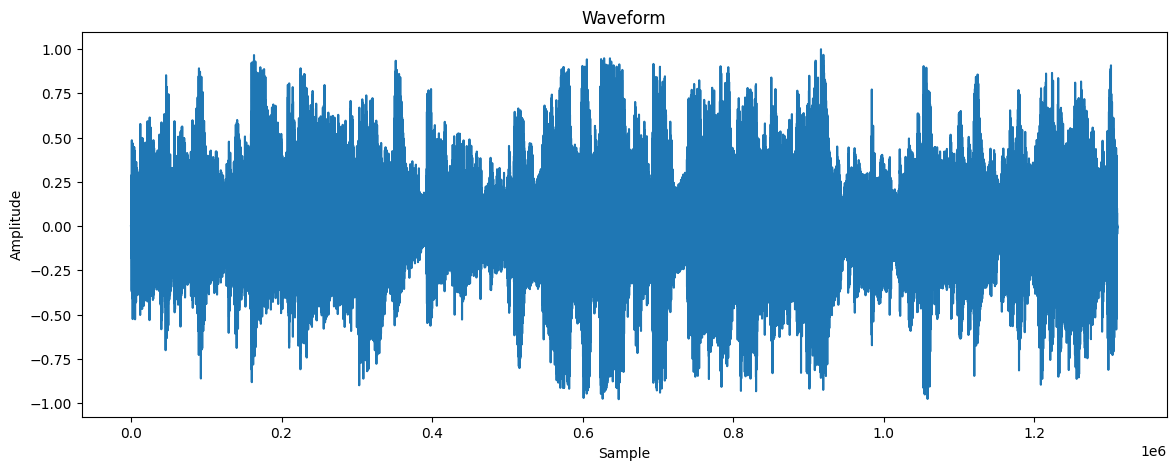

In [ ]:
import matplotlib.pyplot as plt

# Plot the waveform
plt.figure(figsize=(14, 5))
plt.plot(y)
plt.title('Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

Spectrogram:

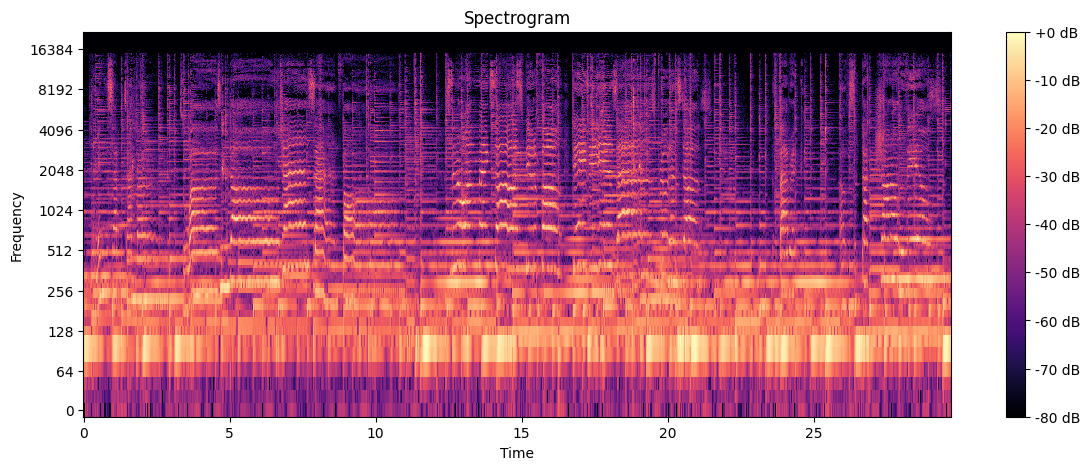

In [ ]:
# Function to download audio file from URL
def download_audio(url):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    return BytesIO(response.content)

# Function to plot the spectrogram from URL
def plot_spectrogram(url):
    # Download and load the audio file
    audio_file = download_audio(url)
    y, sr = librosa.load(audio_file, sr=None)

    # Compute the spectrogram
    D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)

    # Plot the spectrogram
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()

# Example URL (replace with your own URL)
url = dfspotify.loc[0, 'preview_url']

# Plot the spectrogram
plot_spectrogram(url)

In [ ]:
dfspotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             698 non-null    object 
 1   name              698 non-null    object 
 2   artist            698 non-null    object 
 3   album             698 non-null    object 
 4   release_date      698 non-null    object 
 5   popularity        698 non-null    int64  
 6   preview_url       518 non-null    object 
 7   danceability      697 non-null    float64
 8   energy            697 non-null    float64
 9   key               697 non-null    float64
 10  loudness          697 non-null    float64
 11  mode              697 non-null    float64
 12  speechiness       697 non-null    float64
 13  acousticness      697 non-null    float64
 14  instrumentalness  697 non-null    float64
 15  liveness          697 non-null    float64
 16  valence           697 non-null    float64
 1

In [ ]:
# Find rows where 'artist' is 'Vampire Weekend'
vampire_weekend_df = dfspotify[dfspotify['artist'] == 'Vampire Weekend']

# Print the results
print("Rows where artist is 'Vampire Weekend':")
print(vampire_weekend_df)

NameError: name 'dfspotify' is not defined

In [ ]:
# Find rows where 'artist' is 'Vampire Weekend'
vampire_weekend_df = df_trimmed[df_trimmed['artist_name'] == 'Vampire Weekend']

# Print the results
print("Rows where artist is 'Vampire Weekend':")
print(vampire_weekend_df)

Rows where artist is 'Vampire Weekend':
         user_id  song_id  play_count                   title  \
212         6958      549           1       I Stand Corrected   
894         6647     2019           1            Oxford Comma   
895         6647     2672           1                       A   
960        56576     2672           1                       A   
1002       56576     6798           1                 Cousins   
...          ...      ...         ...                     ...   
2086326    47786     1044           1                  Campus   
2086392    47786     2672           1                       A   
2086491    47786     5101           1               White Sky   
2086529    47786     5916           1  Cape Cod Kwassa Kwassa   
2086569    47786     6798           1                 Cousins   

                 release      artist_name  year           title_cleaned  
212      Vampire Weekend  Vampire Weekend  2007       i stand corrected  
894      Vampire Weekend  Vampi

In [ ]:
#paranoid copy for this transformation
dfspotifyb = dfspotify.copy()

# **Data Frame Expansion: Merge new info w df_final**

Checking counts of the two frames Im going to combine so I know what I should expect in terms of unique song titles

In [ ]:
# Display total number of unique user_id
unique_user_countdfspot = dfspotify['title'].nunique()
print(f"Number of unique songs: {unique_user_countdfspot}")

Number of unique songs: 2000


In [ ]:
unique_user_countdfspot = df_trimmed['title'].nunique()
print(f"Number of unique songs: {unique_user_countdfspot}")

Number of unique songs: 5104


I can potentially save this list of 2000 songs that Ive managed to pull and use this help pull the next batch to capture all 5104 songs... but lets get this whole notebook to run first, ms super adhd

Identify missing songs:

In [ ]:


# Assuming you have your dataframes df_trimmed and dfspotify already loaded

# Get the titles from both dataframes
titles_trimmed = set(df_trimmed['title'])
titles_spotify = set(dfspotify['title'])

# Find titles that are in df_trimmed but not in dfspotify
missing_titles = list(titles_trimmed - titles_spotify)

print(f"Number of missing songs: {len(missing_titles)}")


Number of missing songs: 3104


Fetch additional song details

In [ ]:
import pandas as pd
import time
import random
from spotipy import Spotify
from spotipy.exceptions import SpotifyException



def fetch_song_info(song_names, max_retries=5):
    song_info = {}
    for song in song_names:
        attempt = 0
        while attempt < max_retries:
            try:
                results = sp.search(q=song, type="track", limit=1)
                if results["tracks"]["items"]:
                    track = results["tracks"]["items"][0]
                    track_id = track["id"]
                    artist_id = track["artists"][0]["id"]

                    # Fetch audio features, handle potential None response
                    audio_features = sp.audio_features(track_id)[0] if track_id else None

                    song_info[song] = {
                        "name": track["name"],
                        "artist": track["artists"][0]["name"],
                        "album": track["album"]["name"],
                        "release_date": track["album"]["release_date"],
                        "popularity": track["popularity"],
                        "preview_url": track["preview_url"],
                        "danceability": audio_features.get("danceability", None) if audio_features else None,
                        "energy": audio_features.get("energy", None) if audio_features else None,
                        "key": audio_features.get("key", None) if audio_features else None,
                        "loudness": audio_features.get("loudness", None) if audio_features else None,
                        "mode": audio_features.get("mode", None) if audio_features else None,
                        "speechiness": audio_features.get("speechiness", None) if audio_features else None,
                        "acousticness": audio_features.get("acousticness", None) if audio_features else None,
                        "instrumentalness": audio_features.get("instrumentalness", None) if audio_features else None,
                        "liveness": audio_features.get("liveness", None) if audio_features else None,
                        "valence": audio_features.get("valence", None) if audio_features else None,
                        "tempo": audio_features.get("tempo", None) if audio_features else None
                    }
                else:
                    song_info[song] = {"error": "Song not found on Spotify"}
                break  # Break the loop if successful
            except SpotifyException as e:
                if e.http_status == 429:  # Rate limit exceeded
                    delay = 2 ** attempt + random.uniform(0, 1)  # Exponential backoff with jitter
                    print(f"Rate limit exceeded. Retrying in {delay:.2f} seconds...")
                    time.sleep(delay)
                    attempt += 1
                else:
                    raise  # Re-raise the exception if it's not a rate limit issue
            except Exception as e:
                print(f"An error occurred: {e}")
                break  # Exit loop on other errors
    return song_info

# Load your DataFrames
df_trimmed = df_trimmed.copy()
dfspotify = dfspotify.copy()

# Get unique titles from both DataFrames
titles_trimmed = set(df_trimmed['title'])
titles_spotify = set(dfspotify['title'])

# Find titles that are in df_trimmed but not in dfspotify
missing_titles = list(titles_trimmed - titles_spotify)

# Initialize an empty dictionary to store all song information
all_song_info = {}

# Process missing titles in smaller batches
batch_size = 20
for i in range(0, len(missing_titles), batch_size):
    batch_titles = missing_titles[i:i+batch_size]
    print(f"Processing batch {i // batch_size + 1}")
    batch_info = fetch_song_info(batch_titles)
    all_song_info.update(batch_info)

# Convert the all_song_info dictionary to a DataFrame
df_new_songs = pd.DataFrame.from_dict(all_song_info, orient='index')

# Reset index to have a clean 'title' column
df_new_songs.reset_index(inplace=True)
df_new_songs.rename(columns={'index': 'title'}, inplace=True)

# Append the new song details to dfspotify
dfspotify_updated = pd.concat([dfspotify, df_new_songs], ignore_index=True)

# Remove duplicates if necessary
dfspotify_updated = dfspotify_updated.drop_duplicates(subset='title', keep='first')

# Save the updated DataFrame
#dfspotify_updated.to_csv('updated_dfspotify.csv', index=False)

print("Data successfully updated and saved.")


Processing batch 1


ERROR:spotipy.client:Max Retries reached


Rate limit exceeded. Retrying in 1.47 seconds...


ERROR:spotipy.client:Max Retries reached


Rate limit exceeded. Retrying in 2.81 seconds...


ERROR:spotipy.client:Max Retries reached


Rate limit exceeded. Retrying in 4.00 seconds...


ERROR:spotipy.client:Max Retries reached


Rate limit exceeded. Retrying in 8.50 seconds...


ERROR:spotipy.client:Max Retries reached


Rate limit exceeded. Retrying in 16.80 seconds...


ERROR:spotipy.client:Max Retries reached


Rate limit exceeded. Retrying in 1.78 seconds...


ERROR:spotipy.client:Max Retries reached


Rate limit exceeded. Retrying in 2.26 seconds...


ERROR:spotipy.client:Max Retries reached


Rate limit exceeded. Retrying in 4.89 seconds...


KeyboardInterrupt: 

Ive reached my rate limit for the moment, will have to go back and try later.

In [ ]:
# Save dfspotify to a CSV file to use for later if I dont complete everything in this run/ so I can skip the spotify integration
#portion next run
dfspotify.to_csv('dfspotify.csv', index=False)

In [ ]:
# Merge DataFrames on 'title' and 'artist' columns
merged_df = pd.merge(df_trimmed, dfspotify, on='title', how='left')


# Remove duplicates from the merged DataFrame if any
merged_df = merged_df.drop_duplicates()

# Display the merged DataFrame
merged_df.head()

,user_id,song_id,play_count,title,release,artist_name,year,title_cleaned,name,artist,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0,the cove,"The Cover of ""Rolling Stone""",Dr. Hook,...,0.560,9.0,-8.168,1.0,0.0699,0.2010,0.000000,0.2140,0.8260,142.332
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,entre dos aguas,Entre Dos Aguas,Paco de Lucía,...,0.821,4.0,-12.198,0.0,0.0341,0.8490,0.810000,0.1090,0.8650,102.558
2,54961,736,1,Stronger,Graduation,Kanye West,2007,stronger,Stronger,Kanye West,...,0.716,1.0,-7.858,1.0,0.1360,0.0056,0.000000,0.4080,0.4960,104.014
4,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005,constellations,Constellations,Enter Shikari,...,0.367,0.0,-10.086,1.0,0.0425,0.4010,0.000008,0.0747,0.0491,120.355
5,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,learn to fly,Learn to Fly,FKJ,...,0.622,5.0,-8.215,0.0,0.0456,0.1820,0.756000,0.0769,0.3770,87.035


In [ ]:
#b/c im paranoid and tired and dont want to do this again/ in case merging in the next step doesnt work how I want
dft = merged_df.copy()

dft and merged_df have replaced df_trimmed as my test data set; df_b is still the notebook original.

In [ ]:
#just checking that the same number of unique titles are still in the new data frame:
unique_user_countdfspot = dft['title'].nunique()
print(f"Number of unique songs: {unique_user_countdfspot}")

Number of unique songs: 5104


In [ ]:
#just checking that the same number of unique titles are still in the new data frame:
unique_user_countdfspot = df_trimmed['title'].nunique()
print(f"Number of unique songs: {unique_user_countdfspot}")

Number of unique songs: 5104


In [ ]:
#just checking that the same number of unique titles in original:
unique_user_countdfspot = df_b['title'].nunique()
print(f"Number of unique songs: {unique_user_countdfspot}")

Number of unique songs: 5136


In [ ]:
#who am I missing? just checking, should be no one

# Get unique artists from each DataFrame
unique_artists_final = set(df_b['title'].unique())
unique_artists_merged = set(dft['title'].unique())

# Artists in df_final but not in merged_df
artists_not_in_merged = unique_artists_final - unique_artists_merged

# Print results
print(f"Number of unique titles in proper data frame: {len(unique_artists_final)}")
print(f"Number of unique titles in test / spotify pull: {len(unique_artists_merged)}")
print(f"Number of unique song titles in dft but not in df_b: {len(artists_not_in_merged)}")

# Display some of the artists not in merged_df for inspection
print("Titles in df_final but not in merged_df:")
for title in list(artists_not_in_merged)[:50]:  # Displaying first 10 for brevity
    print(title)

Number of unique titles in proper data frame: 5136
Number of unique titles in test / spotify pull: 5104
Number of unique song titles in dft but not in df_b: 5133
Titles in df_final but not in merged_df:

now my feet wont touch the ground
kept it too real amended album version
blame it
mongoloid
easy girls acoustic clubbing
cant fight the moonlight theme from coyote ugly
natural anthem album
harder better faster stronger
breathe in
alexandra
just one nite album version
toxicity
straight outta compton extended mix edit explicit
docking bay
gymnopedie no
sweet baby james
hovering
spectacular views
bubble toes
chinese
heavy water
i found a whistle
the boy is mine duet with monica lp version
untitled
explosive
kiss you all over
twenty three
ms fat booty
rich girl
i am not a robot
suite judy blue eyes lp version
call on me
ghosts and roses
red dirt road
white heat
all we know album version
toxic girl
adrift
lambada
would
new divide album version
age of consent
proceed
square
high on the heel

In [ ]:
dft_final = merged_df.copy()

# **Missing Data Replacement**

So, I noticed a ton of years with the value 0, we have that release date column, Im gonna replace our 0s with the release year

In [ ]:
# Function to extract year from release_date
#expected run time is about 8 minutes
def extract_year(date_str):
    try:
        # Convert to string and handle the case where date is just a year
        date_str = str(date_str)
        if len(date_str) == 4:  # If it's a year in 'YYYY' format
            return int(date_str)
        else:
            # Try to parse the full date format and extract the year
            return pd.to_datetime(date_str).year
    except Exception as e:
        print(f"Error extracting year: {e}")
        return None

# Apply the extraction function to create a new column with extracted years
dft_final['extracted_year'] = dft_final['release_date'].apply(extract_year)

# Replace 0 values in the 'year' column with the extracted year
dft_final['year'] = dft_final.apply(lambda row: row['extracted_year'] if row['year'] == 0 and pd.notna(row['extracted_year']) else row['year'], axis=1)

# Drop the temporary 'extracted_year' column if no longer needed
dft_final = dft_final.drop(columns=['extracted_year'])

# Print the updated DataFrame
print(dft_final)

         user_id  song_id  play_count                   title  \
0          54961      153           1                The Cove   
1          54961      413           2         Entre Dos Aguas   
2          54961      736           1                Stronger   
4          54961      750           1          Constellations   
5          54961     1188           1            Learn To Fly   
...          ...      ...         ...                     ...   
1472664    64590     3390           4                  Unwell   
1472665    64590     3660           2               Ignorance   
1472666    64590     3736           4  Two Is Better Than One   
1472667    64590     3744           3          What I've Done   
1472668    64590     3893           1                      Up   

                               release  \
0                   Thicker Than Water   
1                  Flamenco Para Niños   
2                           Graduation   
4                    In Between Dreams   
5        

paranoid data check, lets see what the unique counts are now between the different data frames after the missing data replacement

In [ ]:
# Display total number of unique user_id
unique_user_counta =df_b['user_id'].nunique()
print(f"Number of unique users: {unique_user_counta}")

Number of unique users: 75157


In [ ]:
# Display total number of unique user_id
unique_user_count = dft_final['user_id'].nunique()
print(f"Number of unique users: {unique_user_count}")

Number of unique users: 75157


In [ ]:
# Display total number of unique user_id
unique_user_count =dft_final['title'].nunique()
print(f"Number of unique users: {unique_user_count}")

Number of unique users: 5104


In [ ]:
#paranoid and tired, making a backup before the next transformation:
bumerged = dft_final.copy()

In [ ]:
bumerged.head()

,user_id,song_id,play_count,title,release,artist_name,year,title_cleaned,name,artist,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,1972.0,the cove,"The Cover of ""Rolling Stone""",Dr. Hook,...,0.560,9.0,-8.168,1.0,0.0699,0.2010,0.000000,0.2140,0.8260,142.332
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976.0,entre dos aguas,Entre Dos Aguas,Paco de Lucía,...,0.821,4.0,-12.198,0.0,0.0341,0.8490,0.810000,0.1090,0.8650,102.558
2,54961,736,1,Stronger,Graduation,Kanye West,2007.0,stronger,Stronger,Kanye West,...,0.716,1.0,-7.858,1.0,0.1360,0.0056,0.000000,0.4080,0.4960,104.014
4,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005.0,constellations,Constellations,Enter Shikari,...,0.367,0.0,-10.086,1.0,0.0425,0.4010,0.000008,0.0747,0.0491,120.355
5,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999.0,learn to fly,Learn to Fly,FKJ,...,0.622,5.0,-8.215,0.0,0.0456,0.1820,0.756000,0.0769,0.3770,87.035


In [ ]:
#check how many missings do we have now after the attempted correction:
# Isolate rows where 'year' is 0
filtered_df = bumerged[bumerged['year'] == 0]

# Print all data associated with these songs
print("Songs with year value of 0 and their associated data:")
print(filtered_df.to_string(index=False))  # Use to_string() to print all columns without index

Songs with year value of 0 and their associated data:


In [ ]:
df_trimmed.describe()

,user_id,song_id,play_count,year
count,1.472669e+06,1.472669e+06,1.472669e+06,1.472669e+06
mean,3.813818e+04,4.987259e+03,1.698253e+00,1.646178e+03
std,2.204569e+04,2.881157e+03,1.136428e+00,7.646563e+02
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.910800e+04,2.450000e+03,1.000000e+00,1.986000e+03
50%,3.794400e+04,5.106000e+03,1.000000e+00,2.003000e+03
75%,5.713700e+04,7.522000e+03,2.000000e+00,2.007000e+03
max,7.635200e+04,9.996000e+03,5.000000e+00,2.010000e+03


In [ ]:
#le sigh, data frame count comparison
bumerged.describe()

,user_id,song_id,play_count,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1.442586e+06,1.442586e+06,1.442586e+06,1.442586e+06,838692.000000,838387.000000,838387.000000,838387.000000,838387.000000,838387.000000,838387.000000,838387.000000,838387.000000,838387.000000,838387.000000,838387.000000
mean,3.814154e+04,4.982484e+03,1.700126e+00,1.847185e+03,35.208766,0.572354,0.666488,5.234618,-7.867136,0.669884,0.093931,0.228930,0.173105,0.204790,0.487020,120.851269
std,2.204652e+04,2.882518e+03,1.138086e+00,5.349327e+02,21.045150,0.176333,0.230804,3.626479,4.314404,0.470255,0.092176,0.293742,0.314697,0.162573,0.251171,28.835484
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.060500,0.011600,0.000000,-35.710000,0.000000,0.023700,0.000002,0.000000,0.010100,0.000010,41.550000
25%,1.911000e+04,2.441000e+03,1.000000e+00,1.996000e+03,18.000000,0.459000,0.527000,2.000000,-9.575000,0.000000,0.037200,0.007220,0.000000,0.099300,0.285000,98.759000
50%,3.794900e+04,5.083000e+03,1.000000e+00,2.004000e+03,36.000000,0.593000,0.707000,5.000000,-6.926000,1.000000,0.052900,0.076800,0.000482,0.136000,0.481000,120.021000
75%,5.714400e+04,7.522000e+03,2.000000e+00,2.008000e+03,50.000000,0.697000,0.857000,8.000000,-4.985000,1.000000,0.111000,0.369000,0.156000,0.274000,0.688000,139.844000
max,7.635200e+04,9.996000e+03,5.000000e+00,2.024000e+03,90.000000,0.975000,0.999000,11.000000,-0.857000,1.000000,0.882000,0.996000,0.994000,0.995000,0.984000,210.018000


In [ ]:
filtered_df.describe()

,user_id,song_id,play_count,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,111583.000000,111583.000000,111583.000000,111583.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,38096.625077,5068.887151,1.737084,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,22050.850040,2901.706080,1.183523,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,19072.000000,2606.000000,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37843.000000,4948.000000,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,57215.000000,7413.000000,2.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,76351.000000,9995.000000,5.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


111583 missing years, if we isolate it to titles it's going to be specific songs.

Im looping back above to the spotify dataframe and cleaning the titles for better matching each step.


# **RECODE**
Now im gonna go ahead and apply decades to the data frames:

In [ ]:
#wanna try that whole time segmentation thing, so lets case our years variable into decades:

# Define the function to get the decade
def get_decade(year):
    if pd.isna(year):
        return None  # Handle missing years
    try:
        year = int(year)
        decade_start = (year // 10) * 10
        return f"{decade_start}s"
    except ValueError:
        return None  # Handle non-integer years

# Apply the function to create a new column 'decade'
bumerged['decade'] = bumerged['year'].apply(get_decade)


In [ ]:
print(bumerged.head())

   user_id  song_id  play_count            title  \
0    54961      153           1         The Cove   
1    54961      413           2  Entre Dos Aguas   
2    54961      736           1         Stronger   
4    54961      750           1   Constellations   
5    54961     1188           1     Learn To Fly   

                         release    artist_name    year    title_cleaned  \
0             Thicker Than Water   Jack Johnson  1972.0         the cove   
1            Flamenco Para Niños  Paco De Lucia  1976.0  entre dos aguas   
2                     Graduation     Kanye West  2007.0         stronger   
4              In Between Dreams   Jack Johnson  2005.0   constellations   
5  There Is Nothing Left To Lose   Foo Fighters  1999.0     learn to fly   

                           name         artist  ...  key loudness  mode  \
0  The Cover of "Rolling Stone"       Dr. Hook  ...  9.0   -8.168   1.0   
1               Entre Dos Aguas  Paco de Lucía  ...  4.0  -12.198   0.0   
2    

In [ ]:
#wanna try that whole time segmentation thing, so lets case our years variable into decade on the note book base/official data set:

# Define the function to get the decade
def get_decade(year):
    if pd.isna(year):
        return None  # Handle missing years
    try:
        year = int(year)
        decade_start = (year // 10) * 10
        return f"{decade_start}s"
    except ValueError:
        return None  # Handle non-integer years

# Apply the function to create a new column 'decade'
df_b['decade'] = df_b['year'].apply(get_decade)


## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id  , cheking the original base
unique_user_count =df_b['user_id'].nunique()
print(f"Number of unique users: {unique_user_count}")

Number of unique users: 3337


In [ ]:
# Display total number of unique user_id, looks like we lost about 1000 users compared to the original import, not too bad actually.
unique_user_count =bumerged['user_id'].nunique()
print(f"Number of unique users: {unique_user_count}")

Number of unique users: 75157


In [ ]:
#comparing my filtered dataframe where I repalced the years count to everyone else: I lost some people but am getting too tired to figure out where
filtercount = df_trimmed['user_id'].nunique()
print(f"Number of unique users: {filtercount}")

Number of unique users: 75157


Total number of unique song id

In [ ]:
# Display total number of unique song_id
unique_s_count = df_b['song_id'].nunique()
print(f"Number of unique songs: {unique_s_count}")

Number of unique songs: 620


Total number of unique artists

In [ ]:
# Display total number of unique artists
unique_art_count = df_trimmed['artist_name'].nunique()
print(f"Number of unique artists: {unique_art_count}")

Number of unique artists: 87


In [ ]:
# Display total number of unique artists, checking my test data frame
unique_art_count = df_b['artist_name'].nunique()
print(f"Number of unique artists: {unique_art_count}")

Number of unique artists: 87


Transformed data is matching the oriign count before I started messing with adding in Spotify, this is good.

Basically, error handling/missing data check. who havent I pulled the spotify information on?

In [ ]:
#who am I missing?

# Get unique artists from each DataFrame
unique_artists_final = set(df_b['artist_name'].unique())
unique_artists_merged = set(df_trimmed['artist_name'].unique())

# Artists in df_final but not in merged_df
artists_not_in_merged = unique_artists_final - unique_artists_merged

# Print results
print(f"Number of unique artists in df_b (original/base): {len(unique_artists_final)}")
print(f"Number of unique artists in my test: {len(unique_artists_merged)}")
print(f"Number of unique artists in base but not in mine: {len(artists_not_in_merged)}")

# Display some of the artists not in merged_df for inspection
print("Artists in base data set but not in my data set:")
for artist in list(artists_not_in_merged)[:50]:  # Displaying first 10 for brevity
    print(artist)

Number of unique artists in df_b (original/base): 247
Number of unique artists in my test: 247
Number of unique artists in base but not in mine: 0
Artists in base data set but not in my data set:


In [ ]:

#Find rows in merged_df where 'artist' contains 'Cat Stevens'
matches_merged_df = dfspotify[dfspotify['artist'].str.contains('Cat Stevens', case=False, na=False)]
print("Matches in merged_df:")
print(matches_merged_df)

# Find rows in df_final where 'artist_name' contains 'Cat Stevens'
matches_df_final = df_trimmed[df_trimmed['artist_name'].str.contains('Cat Stevens', case=False, na=False)]
print("\nMatches in df_final:")
print(matches_df_final)

Matches in merged_df:
Empty DataFrame
Columns: [title, name, artist, album, release_date, popularity, preview_url, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo]
Index: []

Matches in df_final:
         user_id  song_id  play_count                              title  \
4759        4383       30           1                      Oh Very Young   
4777       10723      748           3        Where Do The Children Play?   
4781       10723     1462           1             Another Saturday Night   
4789       10723     2834           1                            Sitting   
4794       10723     4551           1                  Lady D'Arbanville   
...          ...      ...         ...                                ...   
2083919    53608     1856           1                         Moonshadow   
2083938    53608     4551           1                  Lady D'Arbanville   
2084188    74424     6448           1                  

In [ ]:
# Adjust pandas display settings to show all rows
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to multiple lines


# Convert artist names to lowercase for case-insensitive matching
df_trimmed['artist_name_lower'] = df_trimmed['artist_name'].str.lower()
bumerged['artist_lower'] = bumerged['artist'].str.lower()

# String to search for
search_string = 'metallica'.lower()

# Find rows in merged_df where 'artist' matches the search string
matches_merged_df = bumerged[bumerged['artist_lower'].str.contains(search_string, case=False, na=False)]
print("Matches in merged_df:")
print(matches_merged_df[['name', 'album']])

# Find rows in df_final where 'artist_name' matches the search string
matches_df_final = df_trimmed[df_trimmed['artist_name_lower'].str.contains(search_string, case=False, na=False)]
print("\nMatches in df_final:")
print(matches_df_final[['title', 'release']])

# Optionally, drop the temporary lowercase columns if they are no longer needed
df_trimmed.drop(columns=['artist_name_lower'], inplace=True)
bumerged.drop(columns=['artist_lower'], inplace=True)

Matches in merged_df:
                        name                           album
1677    Battery (Remastered)  Master of Puppets (Remastered)
2833    Battery (Remastered)  Master of Puppets (Remastered)
2993    Battery (Remastered)  Master of Puppets (Remastered)
3735    Battery (Remastered)  Master of Puppets (Remastered)
4411    Battery (Remastered)  Master of Puppets (Remastered)
5266    Battery (Remastered)  Master of Puppets (Remastered)
7739    Battery (Remastered)  Master of Puppets (Remastered)
8968    Battery (Remastered)  Master of Puppets (Remastered)
9176    Battery (Remastered)  Master of Puppets (Remastered)
9705    Battery (Remastered)  Master of Puppets (Remastered)
11642   Battery (Remastered)  Master of Puppets (Remastered)
11789   Battery (Remastered)  Master of Puppets (Remastered)
11870   Battery (Remastered)  Master of Puppets (Remastered)
12330   Battery (Remastered)  Master of Puppets (Remastered)
13670   Battery (Remastered)  Master of Puppets (Remastered)
14

#### **Observations and Insights:__________**
So much data even after filtering it down...

### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [ ]:
# Aggregate play counts by song_id, and include title and artist_name
agg_play_count = bumerged.groupby('song_id').agg({
    'play_count': 'sum',        # Sum of play counts
    'title': 'first',           # First title for each song_id
    'artist_name': 'first'      # First artist_name for each song_id
})

# Sort by play_count in descending order
sorted_songs = agg_play_count.sort_values(by='play_count', ascending=False)

# Get the top 10 songs
top_10_songs = sorted_songs.head(10)

print(top_10_songs)



NameError: name 'bumerged' is not defined

In [ ]:
# Count distinct songs per artist
count_interactions_a = bumerged.groupby('artist_name').agg({
    'song_id': 'nunique'  # Count unique song_ids for each artist
}).sort_values(by='song_id', ascending=False)

# Get the top 10 artists
top_10_artists = count_interactions_a.head(10)

print(top_10_artists)


                song_id
artist_name            
The Black Keys       61
Jack Johnson         46
Coldplay             46
Daft Punk            42
The Killers          39
Muse                 38
Radiohead            38
Gorillaz             34
Kings Of Leon        29
Metallica            29


Most interacted users

In [ ]:
# Top 10 users based on the number of ratings
count_interactions = bumerged.groupby('user_id').sum()['play_count'].sort_values(ascending = False)[:10]
count_interactions

,play_count
user_id,
75144,940
31704,935
32542,868
10807,747
3237,720
61472,693
6480,680
23297,672
15733,666


In [ ]:
# Top 10 users based on the number of ratings
count_interactions = df_b.groupby('user_id').sum()['play_count'].sort_values(ascending = False)[:10]
count_interactions

,play_count
user_id,
3237,631
15733,501
62759,479
43041,459
27401,448
37049,442
66268,436
48844,436
23337,434


In [ ]:
# Filter the data for user_id 3237
user_data = df_b[df_b['user_id'] == 3237]
user_data.head(100)
# Sort the filtered data by play_count in descending order
sorted_user_data = user_data.sort_values(by='play_count', ascending=False)
print(sorted_user_data)
# Get the most popular song
most_popular_song = sorted_user_data.head(1)

print(most_popular_song[['song_id', 'title', 'play_count', 'artist_name']])

         user_id  song_id  play_count                               title  \
1695732     3237     5375           5                     i kissed a girl   
1695633     3237     1691           5                       hips dont lie   
1695639     3237     1948           5                             monster   
1695832     3237     8434           5                      howlin for you   
1695643     3237     2098           5                       down to earth   
...          ...      ...         ...                                 ...   
1695808     3237     7878           1                          dont panic   
1695810     3237     7881           1               my boy builds coffins   
1695651     3237     2500           1  never gonna be alone album version   
1695823     3237     8037           1                     gold guns girls   
1695803     3237     7789           1        bedrock radio edit featlloyd   

                                    release                  artist_name  \

#### **Observations and Insights:_______**


df_b contains the user, wasnt able to pull their information for the test data set w/ spotify data.


Songs released on yearly basis

In [ ]:
# Group by 'year' and count the number of unique titles in each year
unique_titles_per_year = df_trimmed.groupby('year')['title'].nunique()

# Optional: Sort by year (ascending)
unique_titles_per_year = unique_titles_per_year.sort_index()

# Print the results
print(unique_titles_per_year)



year
0       21
1969     1
1970     2
1974     1
1978     1
1982     1
1986     1
1988     2
1989     1
1990     2
1991     2
1993     2
1994     1
1995     1
1997     1
1998     1
1999     2
2000     2
2001     1
2002     8
2003     3
2004     2
2005     6
2007     7
2008    11
2009     5
2010     2
Name: title, dtype: int64


In [ ]:
# Group by 'year' and count the number of unique titles in each year
unique_titles_per_year = bumerged.groupby('decade')['title'].nunique()

# Optional: Sort by year (ascending)
unique_titles_per_year = unique_titles_per_yeard.sort_index()

# Print the results
print(unique_titles_per_year)


NameError: name 'bumerged' is not defined

In [ ]:
# Group by 'year' and count the number of unique titles in each year
unique_titles_per_year = df_b.groupby('decade')['title'].nunique()

# Optional: Sort by year (ascending)
unique_titles_per_year = unique_titles_per_year.sort_index()

# Print the results
print(unique_titles_per_year)

decade
0s        97
1960s      2
1970s     15
1980s     14
1990s     46
2000s    438
2010s     18
Name: title, dtype: int64


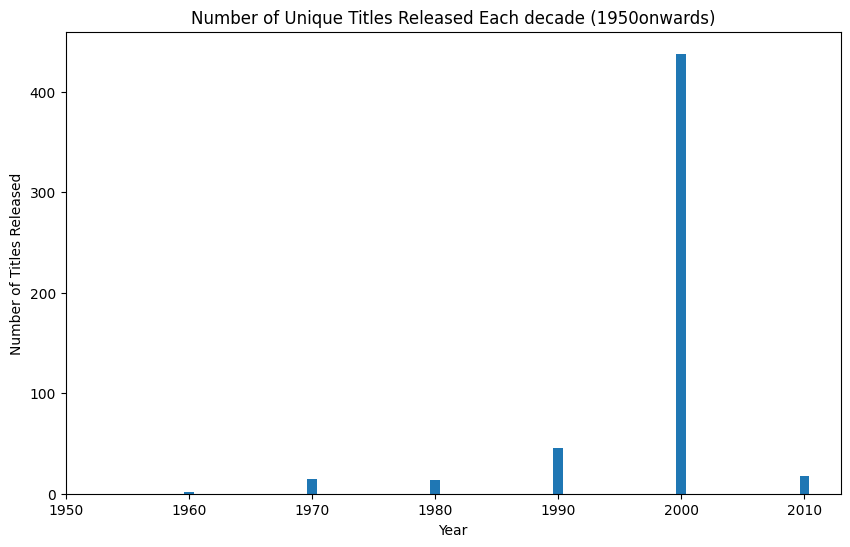

In [ ]:
# Group by 'year' and count the number of unique titles in each year
unique_titles_per_year = df_b.groupby('decade')['title'].nunique()

# Optional: Sort by year (ascending)
unique_titles_per_year = unique_titles_per_year.sort_index()

# Manually fix or exclude the problematic '0s' decade
unique_titles_per_year = unique_titles_per_year[1:] # Excluding the first entry ('0s')

# Extract the numerical part of the decade strings and convert to integers
unique_titles_per_year.index = unique_titles_per_year.index.astype(str).str.slice(0, 4).astype(int)

# Filter the data to include only years from 1965 onwards
filtered_data = unique_titles_per_year[unique_titles_per_year.index >= 1950]

# ... rest of the plotting code ...

# Set up the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
plt.bar(filtered_data.index, filtered_data.values)

# Set the x label
plt.xlabel('Year')

# Set the y label
plt.ylabel('Number of Titles Released')

# Set the title of the plot (optional, but helpful for clarity)
plt.title('Number of Unique Titles Released Each decade (1950onwards)')

# Set x-axis limits to start from 1965
plt.xlim(left=1950)

# Show the plot
plt.show()

In [ ]:
# Group by 'year' and count the number of total plays in each year
tots_titles_per_year = df_trimmed.groupby('year')['play_count'].sum()

# Optional: Sort by year (ascending)
tots_titles_per_year = tots_titles_per_year.sort_index()

# Print the results
print(tots_titles_per_year)


year
0       10370
1969      668
1970      369
1974      327
1978      212
1982      346
1986      247
1988      392
1989      274
1990     1254
1991     1196
1993      416
1994      182
1995      550
1997      261
1998      151
1999      767
2000      407
2001     4941
2002     2329
2003     2459
2004     1181
2005     1775
2007     3578
2008     7893
2009     2505
2010      503
Name: play_count, dtype: int64


In [ ]:
# Group by 'year' and count the number of total plays in each year
tots_titles_per_year = bumerged.groupby('year')['play_count'].sum()

# Optional: Sort by year (ascending)
tots_titles_per_year = tots_titles_per_year.sort_index()

# Print the results
print(tots_titles_per_year)


NameError: name 'bumerged' is not defined

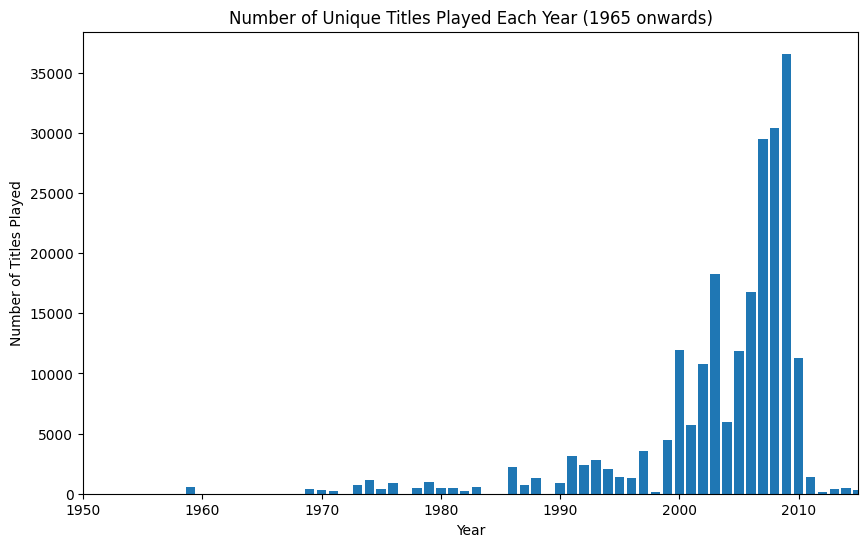

In [ ]:
# Set up the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
plt.bar(tots_titles_per_year.index, tots_titles_per_year.values)

# Set the x label
plt.xlabel('Year')

# Set the y label
plt.ylabel('Number of Titles Played')

# Set the title of the plot (optional, but helpful for clarity)
plt.title('Number of Unique Titles Played Each Year (1965 onwards)')

# Set x-axis limits to start from 1965
plt.xlim(left=1950, right=2015)

# Show the plot
plt.show()

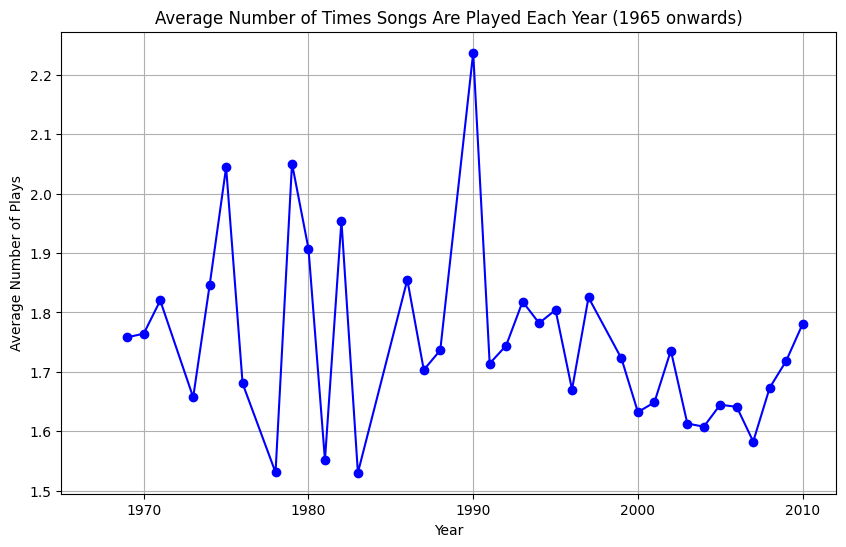

In [ ]:
#are songs being listened to more or less often over time - because there seem to be more of them coming out?
# Group by 'year' and calculate the average play count for each year
average_play_counts_per_year = df_b.groupby('year')['play_count'].mean()

# Filter to include only years from 1965 onwards
average_play_counts_per_year = average_play_counts_per_year[average_play_counts_per_year.index >= 1965]

# Set up the figure size
plt.figure(figsize=(10, 6))

# Create the line plot
plt.plot(average_play_counts_per_year.index, average_play_counts_per_year.values, marker='o', linestyle='-', color='b')

# Set the x label
plt.xlabel('Year')

# Set the y label
plt.ylabel('Average Number of Plays')

# Set the title of the plot
plt.title('Average Number of Times Songs Are Played Each Year (1965 onwards)')

# Set x-axis limits to start from 1965
plt.xlim(left=1965)

# Show the plot
plt.grid(True)
plt.show()

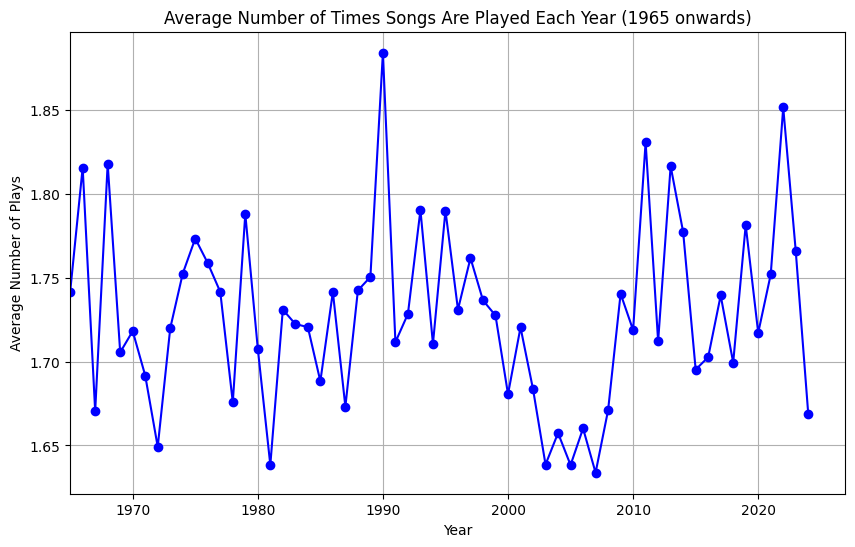

In [ ]:

# Group by 'year' and calculate the average play count for each year
average_play_counts_per_year = bumerged.groupby('year')['play_count'].mean()

# Filter to include only years from 1965 onwards
average_play_counts_per_year = average_play_counts_per_year[average_play_counts_per_year.index >= 1965]

# Set up the figure size
plt.figure(figsize=(10, 6))

# Create the line plot
plt.plot(average_play_counts_per_year.index, average_play_counts_per_year.values, marker='o', linestyle='-', color='b')

# Set the x label
plt.xlabel('Year')

# Set the y label
plt.ylabel('Average Number of Plays')

# Set the title of the plot
plt.title('Average Number of Times Songs Are Played Each Year (1965 onwards)')

# Set x-axis limits to start from 1965
plt.xlim(left=1965)

# Show the plot
plt.grid(True)
plt.show()

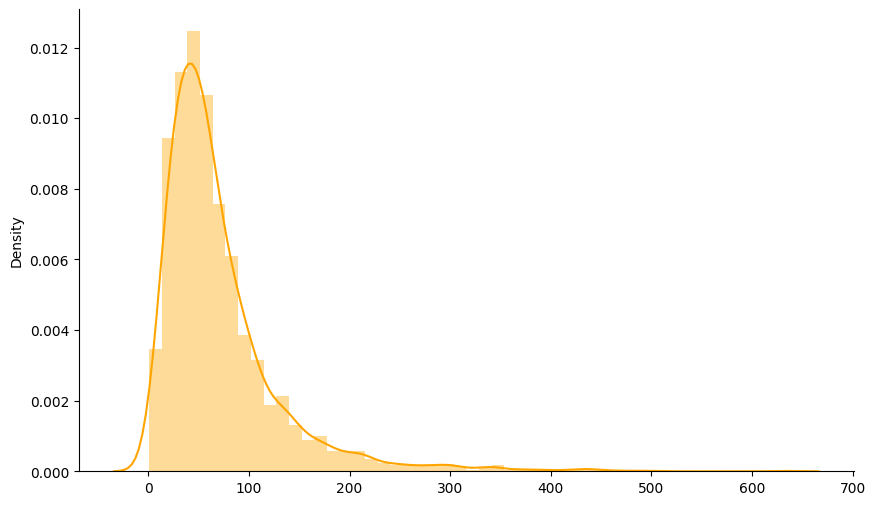

In [ ]:
song_uld = df_b.groupby('user_id')['play_count'].sum()
plt.figure(figsize=(10, 6))
sns.distplot(song_uld.values, color = 'orange')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


#### **Observations and Insights:__________** #

Bulk of the songs have been released in the 2000s from teh data set, bulk of play counts are in 1

**Think About It:** What other insights can be drawn using exploratory data analysis?

# **No Genre? No Problem?**

I cannot get genre to come through w the API, let's pivot.

Lets go ahead and do a poorly assumed genre from the titles because I can only get the tracks portion of the API pull to work currently below (genere is in artist; right now, im using unique songs to help limit the total number of things to pull/it's just easier for me to do. With Artist, I might need to pull all the associated albums and genres/not one to one anymore... needs to be done on the final data frame...):
I want to identify the top words used in titles, gonna be lazy and create some rough categories and assign that to the titles

In [ ]:
bugenre = bumerged.copy()

                   Word  Count
34              version   2414
0                  undo   2385
13                 halo   1870
20                 edit   1812
19                radio   1588
18                 over   1588
17                  are   1588
16                 days   1588
15                  dog   1588
4              stronger   1076
1                harder    977
2                better    977
3                faster    977
32             explicit    918
40                   up    878
72                   im    836
9                  wall    761
8               against    761
7                  back    761
35                jesus    710
10             uprising    703
90                 moon    637
22                great    617
21                 such    617
23              heights    617
112                  be    600
30           starstrukk    583
31   featuringkatyperry    583
33                bonus    583
63                 dont    533
89                  bad    492
41      

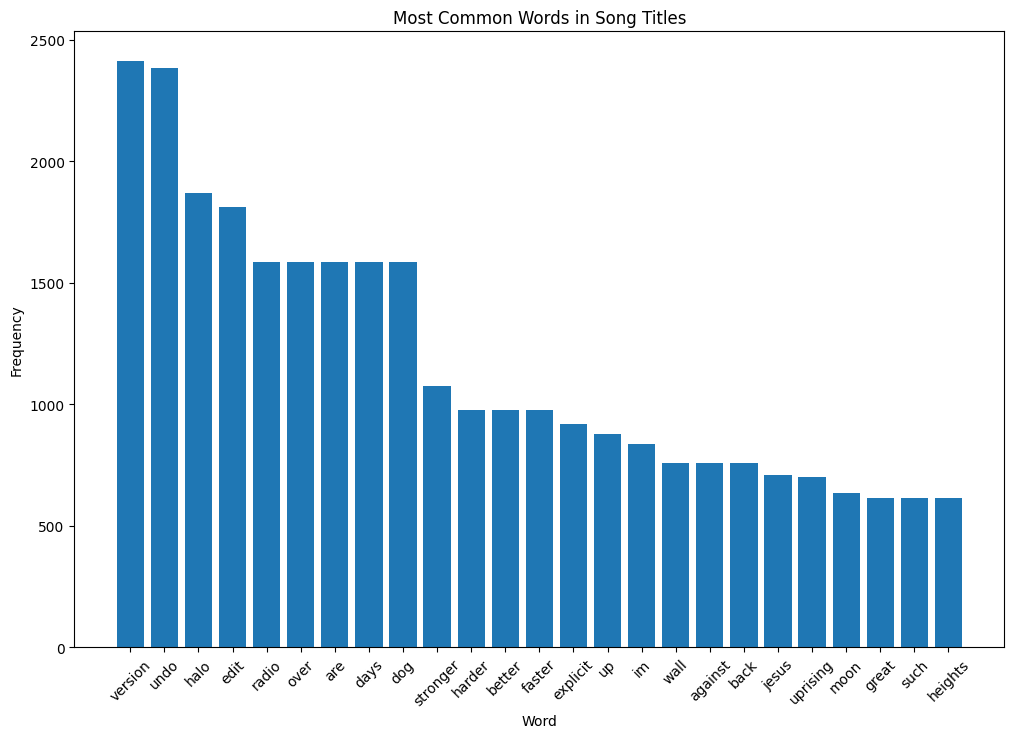

In [ ]:
from collections import Counter
# Step 1: Extract Titles
titles = df_b['title'].dropna()  # Remove any missing values

# Step 2: Tokenize Titles
# Convert all titles to lowercase to ensure case insensitivity
titles = titles.str.lower()

# Split titles into words
words = titles.str.split(expand=True).stack()

# Remove common but uninformative words (optional)
common_words = set([
  '(feat ', '[feat.', '(Ip', 'the', 'and', 'of', 'a', 'to', 'in', 'is', 'it', '&', 'i', 'for', 'on', 'with', 'as', 'at', 'by', 'an', 'or', 'this', 'that', 'you', 'album', 'version)', 'me', 'my', '(album', '(album)', 'edit)'
])
words = words[~words.isin(common_words)]

# Step 3: Count Word Frequencies
word_counts = Counter(words)

# Convert to DataFrame for better visualization
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)

# Step 4: Display Most Common Words
print(word_counts_df.head(50))  # Print top 10 most common words

# Optional: Plot the most common words
plt.figure(figsize=(12, 8))
plt.bar(word_counts_df['Word'].head(25), word_counts_df['Count'].head(25))
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Common Words in Song Titles')
plt.xticks(rotation=45)
plt.show()

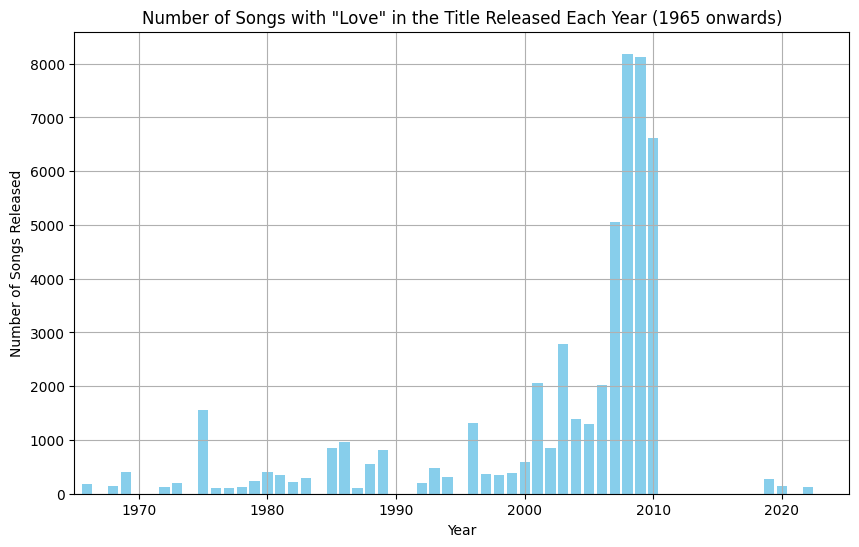

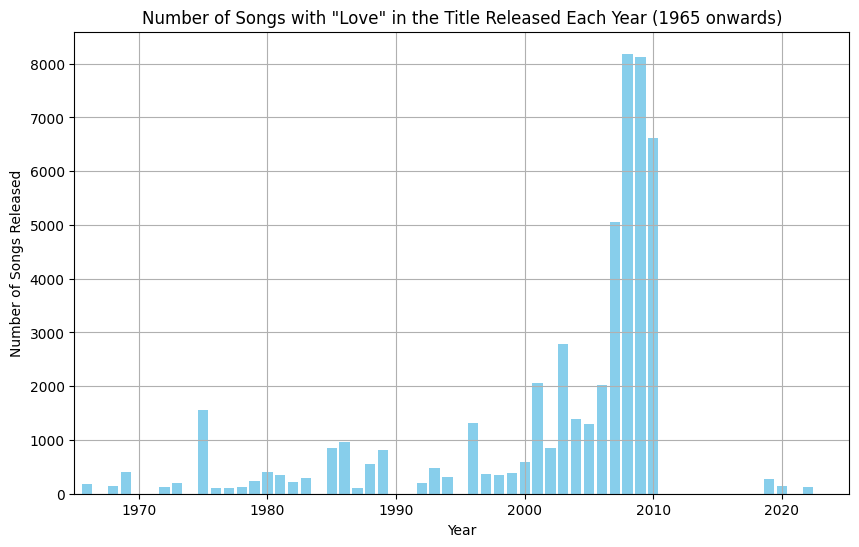

In [ ]:

# Sample DataFrame
# songs_df = pd.DataFrame({'title': ['Love Song', 'Another Song', 'Love Me', 'Endless Love'], 'year': [2020, 2021, 2020, 2021]})

# Step 1: Filter Titles
# Convert titles to lowercase and check if 'love' is in the title
songs_with_love = bugenre[bugenre['title'].str.lower().str.contains('love', na=False)]

# Step 2: Count Songs Released Each Year
# Group by year and count the number of songs
songs_per_year = songs_with_love.groupby('year').size()

# Optional: Filter to include only years from 1965 onwards
songs_per_year = songs_per_year[songs_per_year.index >= 1965]

# Step 3: Plot the Results
plt.figure(figsize=(10, 6))

# Create a bar plot
plt.bar(songs_per_year.index, songs_per_year.values, color='skyblue')

# Set the x label
plt.xlabel('Year')

# Set the y label
plt.ylabel('Number of Songs Released')

# Set the title of the plot
plt.title('Number of Songs with "Love" in the Title Released Each Year (1965 onwards)')

# Set x-axis limits to start from 1965
plt.xlim(left=1965)

# Show the plot
plt.grid(True)
plt.show()
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
# songs_df = pd.DataFrame({'title': ['Love Song', 'Another Song', 'Love Me', 'Endless Love'], 'year': [2020, 2021, 2020, 2021]})

# Step 1: Filter Titles
# Convert titles to lowercase and check if 'love' is in the title
songs_with_love = bugenre[bugenre['title'].str.lower().str.contains('love', na=False)]

# Step 2: Count Songs Released Each Year
# Group by year and count the number of songs
songs_per_year = songs_with_love.groupby('year').size()

# Optional: Filter to include only years from 1965 onwards
songs_per_year = songs_per_year[songs_per_year.index >= 1965]

# Step 3: Plot the Results
plt.figure(figsize=(10, 6))

# Create a bar plot
plt.bar(songs_per_year.index, songs_per_year.values, color='skyblue')

# Set the x label
plt.xlabel('Year')

# Set the y label
plt.ylabel('Number of Songs Released')

# Set the title of the plot
plt.title('Number of Songs with "Love" in the Title Released Each Year (1965 onwards)')

# Set x-axis limits to start from 1965
plt.xlim(left=1965)

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
#I want to look at the song titles with love in it, can I just be like, love = pop or a certain genre?
# Find rows where 'title' contains 'love', case insensitive
love_songs = bugenre[bugenre['title'].str.contains('love', case=False, na=False)]

# Print the result in a cleaner format
print("Songs with 'love' in the title:")
print("="*50)
print(f"{'Title':<30} {'Artist':<20} {'Play Count':<10} {'Year':<4}")
print("="*50)

for index, row in love_songs.iterrows():
    print(f"{row['title']:<30} {row['artist_name']:<20} {row['play_count']:<10} {row['year']:<4}")

print("="*50)

Streaming output truncated to the last 5000 lines.
Ain't Talkin'  'Bout Love      Van Halen            1          0.0 
The Power Of Love              Huey Lewis And The News 1          1985.0
Sowing The Seeds Of Love       Tears For Fears      2          1989.0
The Way I Loved You            Taylor Swift         1          2008.0
Love Story                     Taylor Swift         1          2008.0
Love Story                     Taylor Swift         1          2008.0
Love Story                     Taylor Swift         1          2008.0
Love Story                     Taylor Swift         1          2008.0
Lovefool                       The Cardigans        1          1996.0
I And Love And You             The Avett Brothers   1          2009.0
Not In Love                    Crystal Castles      2          2010.0
Fog. Vs. Mould For The Next Of Love Interpol             1          0.0 
You've Got The Love            Florence + The Machine 2          2009.0
Cosmic Love                    Fl

This might be easier to categorize genres first based on artist, a lot of people on the list that I know are country singers / pop sings/ in different genres are using love in their titles.

In [ ]:
#feeling lazy, just gonna generate the list of artist names to feed to ChatGPT to categorize with a genre for me
unique_artists = bugenre['artist_name'].unique()

# Print unique artists in a clean format
print("Unique Artists:")
print("="*50)

for artist in unique_artists:
    print(artist)

Unique Artists:
Erin McKeown
The Killers
Vampire Weekend
Tiny Vipers
Amy Winehouse
Soltero
Metric
Postal Service
Camera Obscura
Justin Timberlake
Kings Of Leon
Foals
Beirut
Lonnie Gordon
The All-American Rejects
the bird and the bee
The Kills
The Decemberists
The Shins
Ron Carter
Daft Punk
Justice
The Black Keys
LCD Soundsystem
Simian Mobile Disco
Coldplay
Boys Noize
Octopus Project
Fatboy Slim
MSTRKRFT
Cut Copy
Skream
Beastie Boys
Michael Jackson
Lily Allen
The Pussycat Dolls
The Strokes
Chromeo
Deadmau5
Future Rock
Holy Fuck
The Pretend It's December Choir
Rilo Kiley
Modest Mouse
Edward Sharpe & The Magnetic Zeros
Muse
Florence + The Machine
Jason Mraz & Colbie Caillat
Weezer
Linkin Park
Adam Lambert
Justin Bieber
Emmy The Great
Rihanna
Plain White T's
Harmonia
Justin Timberlake;Justin Timberlake featuring will.i.am
Bon Iver
Cage The Elephant
Charttraxx Karaoke
Kelly Clarkson
Fleet Foxes
The Rolling Stones
Death Cab for Cutie
Radiohead
Alicia Keys
Lady GaGa
Train
Taylor Swift
John Ma

In [ ]:
# Define genre mapping
genre_mapping = {
    'The Killers': 'Indie Rock',
    'Vampire Weekend': 'Indie Rock',
    'Kings Of Leon': 'Rock',
    'The Black Keys': 'Blues Rock',
    'The Strokes': 'Indie Rock',
    'Arcade Fire': 'Indie Rock',
    'Arctic Monkeys': 'Indie Rock',
    'Franz Ferdinand': 'Indie Rock',
    'Pixies': 'Alternative Rock',
    'The Cure': 'Post-Punk',
    'Nirvana': 'Grunge',
    'Foo Fighters': 'Rock',
    'Led Zeppelin': 'Hard Rock',
    'Fall Out Boy': 'Pop Punk',
    'Radiohead': 'Alternative Rock',
    'Amy Winehouse': 'Soul',
    'Justin Timberlake': 'Pop',
    'Rihanna': 'Pop',
    'Katy Perry': 'Pop',
    'Lady GaGa': 'Pop',
    'Taylor Swift': 'Pop',
    'Britney Spears': 'Pop',
    'Enrique Iglesias': 'Pop',
    'Selena Gomez & The Scene': 'Pop',
    'Adam Lambert': 'Pop',
    'Shakira': 'Pop',
    'Jason Derulo': 'Pop',
    'Miley Cyrus': 'Pop',
    'Christina Aguilera': 'Pop',
    'Justin Bieber': 'Pop',
    'Kelly Clarkson': 'Pop',
    'Beyoncé': 'Pop',
    'Daft Punk': 'Electronic',
    'Justice': 'Electronic',
    'LCD Soundsystem': 'Dance-Punk',
    'Simian Mobile Disco': 'Electronic',
    'Boys Noize': 'Electronic',
    'Deadmau5': 'Electronic',
    'Fatboy Slim': 'Big Beat',
    'MSTRKRFT': 'Electronic',
    'Cut Copy': 'Electronic',
    'Skream': 'Dubstep',
    'Holy Fuck': 'Electronic',
    'Passion Pit': 'Electronic',
    'Hot Chip': 'Electronic',
    'The Prodigy': 'Electronic',
    'Beastie Boys': 'Hip-Hop',
    'Eminem': 'Hip-Hop',
    'Lil Wayne': 'Hip-Hop',
    'Kanye West': 'Hip-Hop',
    'Drake': 'Hip-Hop',
    'M.I.A.': 'Hip-Hop',
    'Kid Cudi': 'Hip-Hop',
    'B.o.B': 'Hip-Hop',
    'N.E.R.D.': 'Hip-Hop',
    'Lupe Fiasco': 'Hip-Hop',
    'Jadakiss': 'Hip-Hop',
    'Twista': 'Hip-Hop',
    'Ron Carter': 'Jazz',
    'Bill Withers': 'Soul',
    'Sonny Boy Williamson': 'Blues',
    'Chris Bathgate': 'Indie Folk',
    'Jacky Terrasson': 'Jazz',
    'Dwight Yoakam': 'Country',
    'Shania Twain': 'Country',
    'Johnny Cash': 'Country',
    'Lynyrd Skynyrd': 'Southern Rock',
    'Fleet Foxes': 'Indie Folk',
    'Bon Iver': 'Indie Folk',
    'Andrew Bird': 'Indie Folk',
    'Belle & Sebastian': 'Indie Pop',
    'Bright Eyes': 'Indie Rock',
    'Metallica': 'Metal',
    'Godsmack': 'Metal',
    'Five Finger Death Punch': 'Metal',
    'Shakira': 'Latin Pop',
    'Flogging Molly': 'Celtic Punk',
    'Kanye West': 'Hip-Hop',
    'Björk': 'Experimental'
}

# Assign genres to the DataFrame
bugenre['genred'] = bugenre['artist'].map(genre_mapping).fillna('Unknown')

# Print categorized DataFrame
print(bugenre[['title', 'artist', 'genred']])


                          title           artist   genred
0                      The Cove         Dr. Hook  Unknown
1               Entre Dos Aguas    Paco de Lucía  Unknown
2                      Stronger       Kanye West  Hip-Hop
4                Constellations    Enter Shikari  Unknown
5                  Learn To Fly              FKJ  Unknown
...                         ...              ...      ...
1472664                  Unwell  Remember Sports  Unknown
1472665               Ignorance              NaN  Unknown
1472666  Two Is Better Than One    Piano Project  Unknown
1472667          What I've Done    8-Bit Misfits  Unknown
1472668                      Up         Kid Cudi  Hip-Hop

[1442586 rows x 3 columns]


Im going to use my Df_final with the genre assigned based by artist as like... my test/train/validation set later on. Im planning on creating 3 models with genre imputed 3 ways,


1.   Uses algorithm above to force Assign genre based on artist name
2.   artist name + Song title = imputed Genre
3. K nearest neighbors/clustering  = genre

Artist and Lazy Song cateogirzation, the third Im gonna go ahead and try out some Machine Learning Algorithms to predict the genre and then run stuff that way/

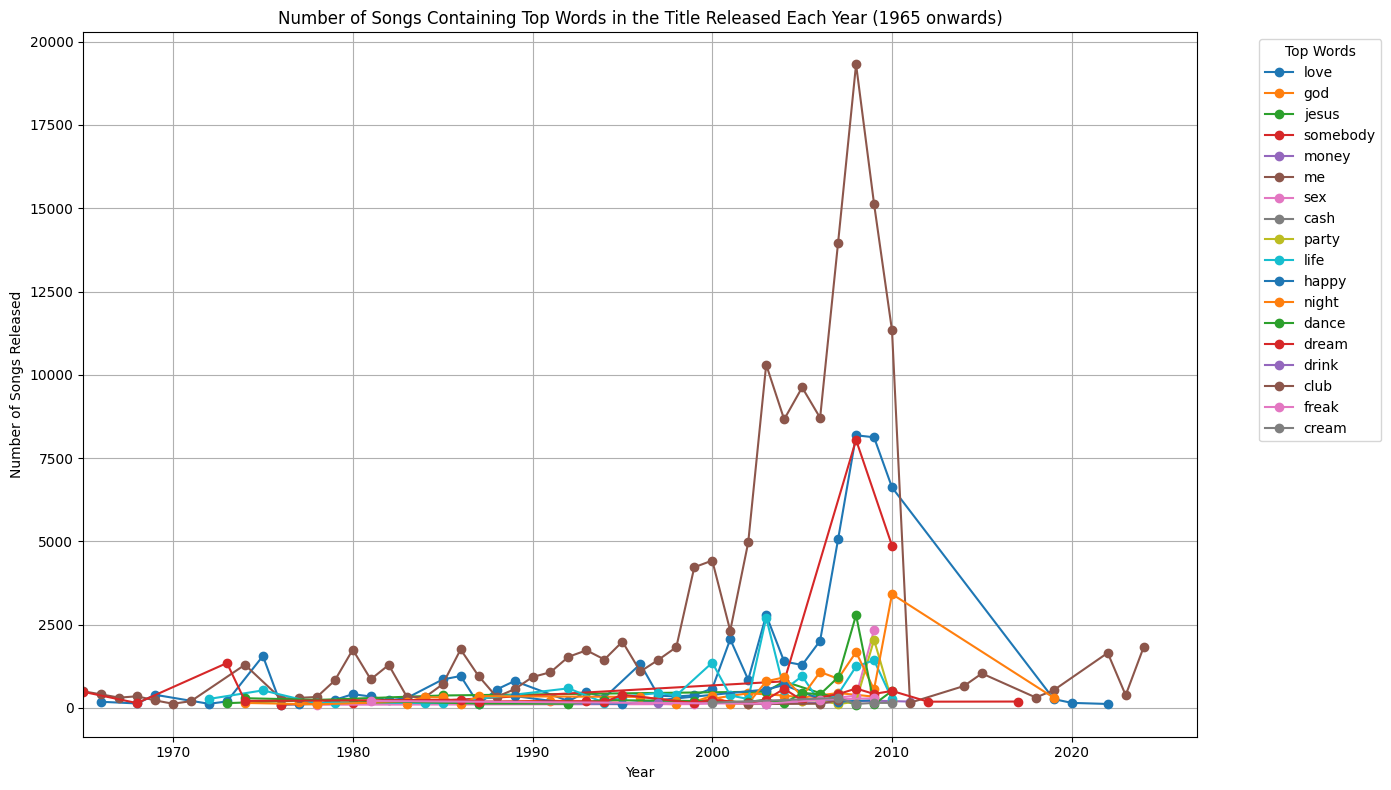

In [ ]:

# Define the top 10 words
top_10_words = ['love', 'god', 'jesus', 'somebody', 'money', 'me', 'sex', 'cash', 'party', 'life', 'happy', 'night', 'dance', 'dream', 'drink', 'club', 'freak', 'cream']

# Initialize a dictionary to store the number of songs per year for each word
word_trends = {}

# Loop through each top word
for word in top_10_words:
    # Filter titles that contain the word
    songs_with_word = bugenre[bugenre['title'].str.lower().str.contains(word, na=False)]

    # Count the number of songs released each year
    songs_per_year = songs_with_word.groupby('year').size()

    # Optional: Filter to include only years from 1965 onwards
    songs_per_year = songs_per_year[songs_per_year.index >= 1965]

    # Store the data in the dictionary
    word_trends[word] = songs_per_year

# Plot the results
plt.figure(figsize=(14, 8))

# Plot each word's trend
for word, trend in word_trends.items():
    plt.plot(trend.index, trend.values, marker='o', label=word)

# Set the x label
plt.xlabel('Year')

# Set the y label
plt.ylabel('Number of Songs Released')

# Set the title of the plot
plt.title('Number of Songs Containing Top Words in the Title Released Each Year (1965 onwards)')

# Set x-axis limits to start from 1965
plt.xlim(left=1965)

# Add a legend
plt.legend(title='Top Words', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


          Word  Average Play Count
23       drink            1.859060
6     somebody            1.745841
18        life            1.737743
15         sex            1.729070
22       dream            1.708129
8           me            1.706065
13        hell            1.695007
11      sunday            1.687218
0         love            1.678880
1      america            1.672923
10       jesus            1.669784
7        money            1.668415
21       dance            1.667783
17       party            1.652809
20       night            1.642077
26       cream            1.605442
19       happy            1.604442
24        club            1.602941
9          god            1.595737
14       bible            1.582375
5         thug            1.578740
25       freak            1.497701
4       cowboy            1.481547
2       united                 NaN
3      patriot                 NaN
12  revelation                 NaN
16        cash                 NaN


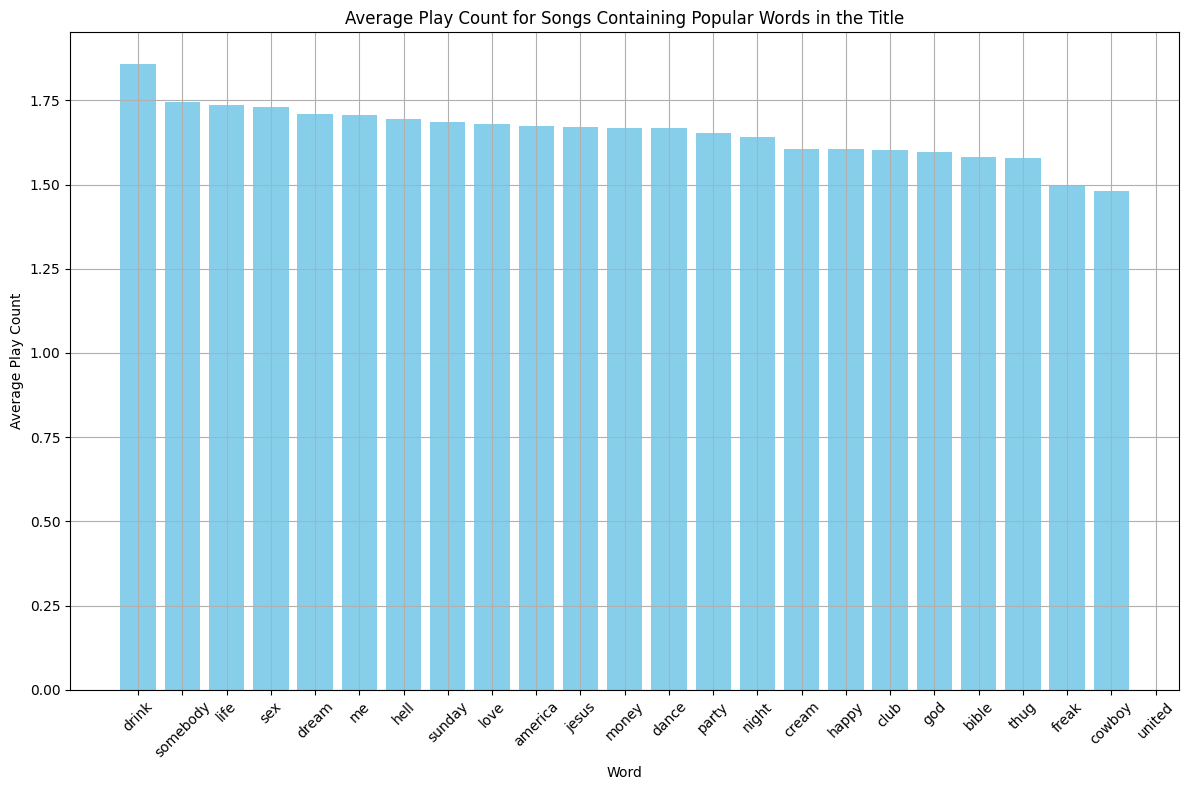

In [ ]:


# Sample DataFrame
# df_final = pd.DataFrame({'title': ['Love Song', 'Party Time', 'Money Maker', 'Happy Life', 'Dance Night'], 'play_count': [100, 200, 150, 300, 250]})

# Define the list of top words
top_words = ['love', 'america', 'united', 'patriot', 'cowboy', 'thug', 'somebody', 'money', 'me', 'god','jesus', 'sunday', 'revelation', 'hell', 'bible', 'sex', 'cash', 'party', 'life', 'happy', 'night', 'dance', 'dream', 'drink', 'club', 'freak', 'cream']

# Initialize a dictionary to store average play counts
average_play_counts = {}

# Loop through each top word
for word in top_words:
    # Filter titles that contain the word
    songs_with_word = df_b[df_b['title'].str.lower().str.contains(word, na=False)]

    # Calculate the average play count for these songs
    avg_play_count = songs_with_word['play_count'].mean()

    # Store the result in the dictionary
    average_play_counts[word] = avg_play_count

# Convert to DataFrame for better visualization
average_play_counts_df = pd.DataFrame(list(average_play_counts.items()), columns=['Word', 'Average Play Count'])

# Sort by average play count
average_play_counts_df = average_play_counts_df.sort_values(by='Average Play Count', ascending=False)

# Print the results
print(average_play_counts_df)

# Optional: Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.bar(average_play_counts_df['Word'], average_play_counts_df['Average Play Count'], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Average Play Count')
plt.title('Average Play Count for Songs Containing Popular Words in the Title')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


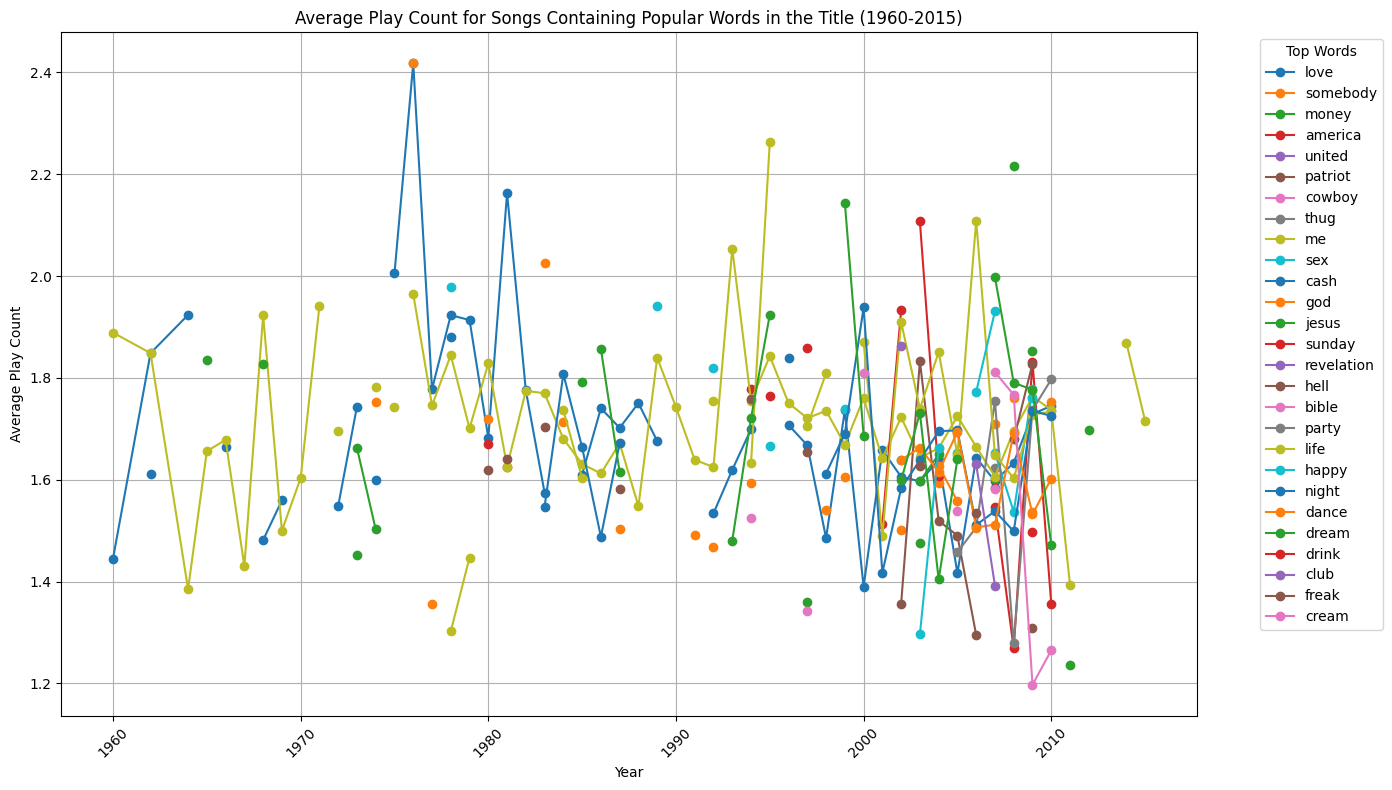

In [ ]:
#quick check, assumption - religious songs have become less popular over time? average play by top words, basically are people still listening to jesus songs

# Define the list of top words
top_words = ['love', 'somebody', 'money', 'america', 'united', 'patriot', 'cowboy', 'thug','me', 'sex', 'cash','god','jesus', 'sunday', 'revelation', 'hell', 'bible',  'party', 'life', 'happy', 'night', 'dance', 'dream', 'drink', 'club', 'freak', 'cream']

# Initialize a dictionary to store average play counts by year
word_trends = {}

# Loop through each top word
for word in top_words:
    # Filter titles that contain the word
    songs_with_word = bugenre[bugenre['title'].str.lower().str.contains(word, na=False)]

    # Group by year and calculate the average play count
    avg_play_count_by_year = songs_with_word.groupby('year')['play_count'].mean()

    # Store the result in the dictionary
    word_trends[word] = avg_play_count_by_year

# Create a DataFrame from the word trends dictionary
trends_df = pd.DataFrame(word_trends)

# Filter years between 1960 and 2015
trends_df = trends_df[(trends_df.index >= 1960) & (trends_df.index <= 2015)]

# Plot the results
plt.figure(figsize=(14, 8))

for word in top_words:
    if word in trends_df.columns:
        plt.plot(trends_df.index, trends_df[word], marker='o', label=word)

plt.xlabel('Year')
plt.ylabel('Average Play Count')
plt.title('Average Play Count for Songs Containing Popular Words in the Title (1960-2015)')
plt.legend(title='Top Words', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#Ok, now Im gonna start assigning genres for the unknown artists/who chat gpt couldnt help with based on words in the song title:
# Create a DataFrame
bugenre = pd.DataFrame(bugenre)

# Genre keywords
genre_keywords = {
    'Love': ['love', 'amor', 'enchanted', 'encantado'],
    'Pop': ['party', 'dance', 'baby', 'happy', 'party'],
    'Rock': ['rock', 'star', 'guitar', 'band', 'hate', 'machine', 'rage'],
    'Hip-Hop': ['rap', 'flow', 'street', 'beat', 'drink', 'club', 'freak', 'cream', 'ak'],
    'Religious':['jesus', 'god', 'church', 'judgement day', 'holy', 'sacred', 'messiah', 'emmanuelle', 'glory'],
    'Country': ['country', 'cowboy', 'honky', 'ranch', 'tractor', 'trailor', 'truck', 'america', 'united']
}

# Function to categorize genre based on title keywords
def categorize_genre_by_title(title):
    title_lower = title.lower()
    for genre, keywords in genre_keywords.items():
        if any(keyword.lower() in title_lower for keyword in keywords):
            return genre
    return 'Unknown'

# Only update genres where the genre is 'Unknown'
bugenre.loc[bugenre['genred'] == 'Unknown', 'genred'] = bugenre.loc[bugenre['genred'] == 'Unknown', 'title'].apply(categorize_genre_by_title)

# Print the DataFrame with genres
print(bugenre)

         user_id  song_id  play_count                   title  \
0          54961      153           1                The Cove   
1          54961      413           2         Entre Dos Aguas   
2          54961      736           1                Stronger   
4          54961      750           1          Constellations   
5          54961     1188           1            Learn To Fly   
...          ...      ...         ...                     ...   
1472664    64590     3390           4                  Unwell   
1472665    64590     3660           2               Ignorance   
1472666    64590     3736           4  Two Is Better Than One   
1472667    64590     3744           3          What I've Done   
1472668    64590     3893           1                      Up   

                               release  \
0                   Thicker Than Water   
1                  Flamenco Para Niños   
2                           Graduation   
4                    In Between Dreams   
5        

Text Processing - move this higher possibly:

Below we are loading the rating dataset, which is a pandas dataframe, into a different format called surprise.dataset.DatasetAutoFolds which is required by this library. To do this we will be using the classes Reader and Dataset.

In [ ]:
#one hot encoding, transforming categorized data into machine-readable features... this isnt categorized, so lets see what happens.
def ohe_prep(df_b, title, new_name):
    '''
    Create One Hot Encoded features of a specific column
    ---
    Input:
    df (pandas dataframe): Spotify Dataframe
    column (str): Column to be processed
    new_name (str): new column name to be used

    Output:
    tf_df: One-hot encoded features
    '''

    tf_df = pd.get_dummies(df_b[title])
    feature_names = tf_df.columns
    tf_df.columns = [new_name + "|" + str(i) for i in feature_names]
    tf_df.reset_index(drop = True, inplace = True)
    return tf_df

In [ ]:
# TF-IDF implementation
#install vector library
#!pip install scikit-learn
#from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix =  tfidf.fit_transform(df_b['title'].apply(lambda x: " ".join(x)))
genre_df = pd.DataFrame(tfidf_matrix.toarray())
genre_df.columns = ['title' + "|" + i for i in tfidf.get_feature_names()]
#genre_df.drop(columns='genre|unknown') # Drop unknown genre
genre_df.reset_index(drop = True, inplace=True)
genre_df.iloc[0]

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
# Normalization
pop = df_b[["artist_pop"]].reset_index(drop = True)
scaler = MinMaxScaler()
pop_scaled = pd.DataFrame(scaler.fit_transform(pop), columns = pop.columns)
pop_scaled.head()

## Building various models

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

structure the data frame to deal with cold start issue: popular artists that are listened to more than x times, users with at least x unique artists

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
#average play count for each song
# Group by 'song_id' and calculate the average 'play_count'
average_play_count = df_b.groupby('song_id')['play_count'].mean().reset_index()

# Rename columns for clarity (optional)
average_play_count.columns = ['song_id', 'average_play_count']

print(average_play_count)

     song_id  average_play_count
0         21            1.631387
1         22            1.464286
2         50            1.616822
3         52            1.715232
4         62            1.727273
..       ...                 ...
615     9939            1.673640
616     9942            2.484277
617     9960            1.598592
618     9981            1.900621
619     9989            1.336066

[620 rows x 2 columns]


In [ ]:
#Calculating the Frequency/ most popular song basically
# Group by 'song_id' and calculate the total 'play_count'
total_play_count = df_b.groupby('song_id')['play_count'].sum().reset_index()

# Rename columns for clarity (optional)
total_play_count.columns = ['song_id', 'total_play_count']

print(total_play_count)

     song_id  total_play_count
0         21               447
1         22               205
2         50               173
3         52               777
4         62               209
..       ...               ...
615     9939               400
616     9942               395
617     9960               227
618     9981               306
619     9989               163

[620 rows x 2 columns]


In [ ]:
# Making a dataframe with the average_count and play_freq
# Calculate average play count
average_play_count = df_b.groupby('song_id')['play_count'].mean().reset_index()
average_play_count.columns = ['song_id', 'average_play_count']

# Calculate total play count (frequency)
total_play_count = df_b.groupby('song_id')['play_count'].sum().reset_index()
total_play_count.columns = ['song_id', 'total_play_count']

# Merge the two DataFrames on 'song_id'
final_play = pd.merge(average_play_count, total_play_count, on='song_id')

# Display the first five records of the final_play DataFrame
print(final_play.head())

   song_id  average_play_count  total_play_count
0       21            1.631387               447
1       22            1.464286               205
2       50            1.616822               173
3       52            1.715232               777
4       62            1.727273               209


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
#min playcount helping w coldstart
def get_top_n_songs(df_b, n=10, by='average_play_count', min_play_count=5):
    """
    Function to find the top `n` songs based on a specified criterion.

    Parameters:
    - df (pd.DataFrame): DataFrame containing 'song_id', 'average_play_count', and 'total_play_count'
    - n (int): Number of top songs to return
    - by (str): Criterion to sort by ('average_play_count' or 'total_play_count')

    Returns:
    - pd.DataFrame: DataFrame containing the top `n` songs
    """
    if by not in ['average_play_count', 'total_play_count']:
        raise ValueError("Criterion must be either 'average_play_count' or 'total_play_count'")

    # Sort the DataFrame by the specified criterion in descending order
    top_songs = df_b.sort_values(by=by, ascending=False).head(n)

    return top_songs



# Get top 5 songs by highest average play count
top_5_avg = get_top_n_songs(final_play, n=10, by='average_play_count')

# Get top 5 songs by highest total play count
top_5_total = get_top_n_songs(final_play, n=10, by='total_play_count')

print("Top 5 Songs by Average Play Count:")
print(top_5_avg)

print("\nTop 5 Songs by Total Play Count:")
print(top_5_total)

Top 5 Songs by Average Play Count:
     song_id  average_play_count  total_play_count
446     7224            3.366972               367
404     6450            2.618182               288
529     8324            2.611650               269
616     9942            2.484277               395
537     8483            2.307692               300
345     5531            2.305723              1531
47       657            2.283019               363
353     5653            2.272727               250
44       614            2.236908               897
149     2220            2.205997              1692

Top 5 Songs by Total Play Count:
     song_id  average_play_count  total_play_count
540     8582            1.951311              3126
397     6293            1.753165              2216
91      1286            1.928261              1774
234     3567            1.794297              1762
29       352            2.184539              1752
149     2220            2.205997              1692
489     7796 

In [ ]:
# Recommend top 10 songs using the function defined above
# Get top 5 songs by highest average play count
top_5_avg = get_top_n_songs(final_play, n=10, by='average_play_count')

# Get top 5 songs by highest total play count
top_5_total = get_top_n_songs(final_play, n=10, by='total_play_count')

print("Top 5 Songs by Average Play Count:")
print(top_5_avg)

print("\nTop 5 Songs by Total Play Count:")
print(top_5_total)

Top 5 Songs by Average Play Count:
     song_id  average_play_count  total_play_count
446     7224            3.366972               367
404     6450            2.618182               288
529     8324            2.611650               269
616     9942            2.484277               395
537     8483            2.307692               300
345     5531            2.305723              1531
47       657            2.283019               363
353     5653            2.272727               250
44       614            2.236908               897
149     2220            2.205997              1692

Top 5 Songs by Total Play Count:
     song_id  average_play_count  total_play_count
540     8582            1.951311              3126
397     6293            1.753165              2216
91      1286            1.928261              1774
234     3567            1.794297              1762
29       352            2.184539              1752
149     2220            2.205997              1692
489     7796 

# Collaborative Filtering Recommendation Systems

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

!pip install surprise

In [ ]:
# Import necessary libraries
# To compute the accuracy of models
from surprise import accuracy

# Class is used to parse a file containing ratings, data should be in structure - user ; item ; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering




### Some useful functions

Key Time-Aware Metrics
Temporal Precision and Recall:

Temporal Precision: Measures how many of the top recommendations within a specific time window (e.g., the last month) are relevant to the user. For example, if a recommendation system suggests 10 songs, and 4 are from the last 6 months, temporal precision assesses how many of these recent songs are actually relevant.
Temporal Recall: Evaluates how many of the relevant items from a specific time window are included in the recommendations. For instance, if there are 10 relevant songs from the last year, and the system recommends 6 of them, temporal recall measures the proportion of these recent relevant songs that were recommended.

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [ ]:
def precision_recall_at_k(model, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    #Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

Below we are loading the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this we will be **using the classes `Reader` and `Dataset`**

You will also notice here that we read the dataset by providing a scale of ratings. However, as you would know, we do not have ratings data of the songs. In this case, we are going to use play_count as a proxy for ratings with the assumption that the more the user listens to a song, the higher the chance that they like the song

Run on notebook approved model:

In [ ]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(0, 5)) #use rating scale (0, 5)
# Loading the dataset
data = Dataset.load_from_df(df_b[["user_id","song_id","play_count"]], reader)

# Splitting the data into train and test dataset
# Add code to split the dataset here
trainset, testset = train_test_split(data, test_size=0.4, random_state = 42)

In [ ]:
#Run time - 25 minutes
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': True}

# Initialize the KNNBasic model using sim_options provided, Verbose = False, and setting random_state = 1
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Fit the model on the training data
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score using the precision_recall_at_k function defined above
precision_recall_at_k(sim_user_user)

RMSE: 1.0817
Precision:  0.401
Recall:  0.705
F_1 score:  0.511


**Observations and Insights:_________**

Relevant recommendations for half of the users (F_1 .51) for the user user collaborative model, error is over one. Can be improved further. Precision...

In [ ]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id
sim_user_user.predict("6958", "1671", r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='1671', r_ui=2, est=1.698939503494818, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict("6958", "3232", verbose = True) # Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='3232', r_ui=None, est=1.698939503494818, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:_________**
extimated prediction is 1.7, slightly off of the actual of 2... is this person just flat expected to listen to stuff 1.7 times?

# **Now, let's try to tune the model and see if we can improve the model performance.**

Below, we will be tuning hyperparameters for the KNNBasic algorithm. Let's try to understand some of the hyperparameters of the KNNBasic algorithm:

k (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.
min_k (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
sim_options (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise -
cosine
msd (default)
Pearson
Pearson baseline

In [ ]:
# Estimated Run time? Forever?
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [True], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)
# Fitting the data
 # Use entire data for GridSearch
gs.fit(data)
# Best RMSE score
print(gs.best_score['rmse'])
# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0028271187047528
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


Once the grid search is complete, we can get the optimal values for each of those hyperparameters.

In [ ]:
# Train the best model found in above gridsearch
# Using the optimal similarity measure for user-user based collaborative filtering
# final model by using tuned values of the hyperparameters, which we received by using grid search cross-validation
sim_options = {'name': 'msd',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 9, random_state = 1, verbose = False)


# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10
precision_recall_at_k(sim_user_user_optimized)

RMSE: 1.0271
Precision:  0.446
Recall:  0.624
F_1 score:  0.52


**Observations and Insights:_________**   Not much better than the original, mild increases to F_1, nominal decline to RMSE.

In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict("6958", "1671",r_ui =2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='1671', r_ui=2, est=1.698939503494818, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict("6958", "3232", verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='3232', r_ui=None, est=1.698939503494818, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:______________**

.... just a flat 1.7 for the user no matter what

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [ ]:
# Use inner id 0
# 0 is the inner id of the above user
sim_user_user_optimized.get_neighbors(0, 5)

[3, 6, 9, 11, 14]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Handling the duplicates in the data
    recommendations_df = df_b.drop_duplicates(subset=['user_id', 'song_id'])

    # Creating an user item interactions matrix
    user_item_interactions_matrix = recommendations_df.pivot(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those product ids which the user_id has not interacted yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the product ids which user_id has not interacted yet
    for item_id in non_interacted_products:

        # Predicting the ratings for those non interacted product ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings to the list
        recommendations.append((item_id, est))

    # Create a DataFrame from the recommendations list
    recommendations_df = pd.DataFrame(recommendations, columns=['item_id', 'est'])

    # Sorting the predicted ratings in descending order
    recommendations_df = recommendations_df.sort_values(by='est', ascending=False)

    return recommendations_df.head(top_n) # Returing top n highest predicted rating products for this user

In [ ]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
#Making top 5 recommendations for user_id "A3LDPF5FMB782Z" with a similarity-based recommendation engine
recommendations = get_recommendations(df_b, 6958, 5, sim_user_user_optimized)


In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"


pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])


,song_id,predicted_play_count
0,7224,3.448365
1,5344,2.701891
2,3951,2.668535
3,5653,2.563758
4,6450,2.544007


In [ ]:
print(recommendations)

[(7224, 3.4483652672018206), (5344, 2.701890989988877), (3951, 2.668535323814539), (5653, 2.5637583892617455), (6450, 2.5440068656431776)]


**Observations and Insights:______________**

Got the predicted_play counts for my user that I just keep pulling 1.7 on, will need to go back and check out what is going on there.

### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, final_play):

 # Drop duplicate user_id and song_id combinations, keeping the first occurrence
  ranked_songs = recommendations.drop_duplicates(subset=['user_id', 'song_id'], keep='first')


  # Sort the songs based on ratings count using the 'song_id' column
  ranked_songs = recommendations.sort_values('play_count', ascending = False)[['song_id', 'play_count']].reset_index(drop=True)

  # Merge with the recommended songs to get predicted ratings (You might need to adjust this based on how 'recommendations' is structured)
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ["song_id", "predicted_ratings"]), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected ratings
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_count'])

  # Sort the movies based on corrected ratings
  ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending = False)

  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [ ]:
ranking_songs(df_b, sim_user_user_optimized)

,song_id,play_count,predicted_ratings,corrected_ratings
0,97,5,NaN,NaN
1,97,5,NaN,NaN
2,97,5,NaN,NaN
3,97,5,NaN,NaN
4,97,5,NaN,NaN
...,...,...,...,...
46025862,3038,1,NaN,NaN
46025863,3038,1,NaN,NaN
46025864,3038,1,NaN,NaN
46025865,3038,1,NaN,NaN


**Observations and Insights:______________**
did something wrong. I have to go back and drop duplicates regardless of release, but it's not happening at this point.

### Item Item Similarity-based collaborative filtering recommendation systems

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the train set, and predict ratings for the test set
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

RMSE: 1.0320
Precision:  0.316
Recall:  0.572
F_1 score:  0.407


**Observations and Insights:______________**
F1 at .407, RSME over 1.

In [ ]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) listened to by the user
sim_item_item.predict('6958', '1671', r_ui = 4, verbose = True)

user: 6958       item: 1671       r_ui = 4.00   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='1671', r_ui=4, est=1.698939503494818, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [ ]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict('1659', '1671', verbose = True)

user: 6958       item: 400        r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='400', r_ui=None, est=1.698939503494818, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:______________**

... still 1.7 predicted listening times for the user, same as other models...
... off by 2.3 listens for the predicted vs actual.

In [ ]:
#Estimated Run Time: forever - 11 motherducking minutes
# Apply grid search for enhancing model performance
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }

# Performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Find the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...

**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [ ]:
# Apply the best model found in the grid search
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'msd',
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 20, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k, f1_score and RMSE
precision_recall_at_k(sim_item_item_optimized)


RMSE: 1.0248
Precision:  0.371
Recall:  0.562
F_1 score:  0.447


**Observations and Insights:______________**
Overall F_1 score improved slightly, up to being relevent .447. Error is still over 1.02.

In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict("6958", "1671",r_ui=3,  verbose = True)

user: 6958       item: 1671       r_ui = 3.00   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='1671', r_ui=3, est=1.698939503494818, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [ ]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not listened to by the user
sim_item_item_optimized.predict("6958", "3232", verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='3232', r_ui=None, est=1.698939503494818, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:______________**
... no matter what the predicted play count is the same as the other models.

In [ ]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, k = 5)

[13, 16, 18, 29, 39]

In [ ]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_b, 6958, 5, sim_item_item_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'play_count'])

,song_id,play_count
520,NaN,NaN
395,NaN,NaN
280,NaN,NaN
500,NaN,NaN
179,NaN,NaN


**Observations and Insights:_________**

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
# Build baseline model using svd
# Using SVD matrix factorization
svd = SVD(random_state=1)

# Training the algorithm on the train set
svd.fit(trainset)

# Let us compute precision@k and recall@k with k=10
precision_recall_at_k(svd)

RMSE: 1.0026
Precision:  0.432
Recall:  0.654
F_1 score:  0.52


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
# Making prediction
svd.predict("6958", "1671", r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.70   {'was_impossible': False}


Prediction(uid='6958', iid='1671', r_ui=2, est=1.698939503494818, details={'was_impossible': False})

In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict("6958", "3232", verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': False}


Prediction(uid='6958', iid='3232', r_ui=None, est=1.698939503494818, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performing 3-fold gridsearch cross-validation
gs_ = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting data
gs_.fit(data)

# Best RMSE score
# Best RMSE score
print(gs_.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs_.best_params['rmse'])



1.0032959167295574
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [ ]:
# Building the optimized SVD model using optimal hyperparameters
# Building the optimized SVD model using optimal hyperparameters search
svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Training the algorithm on the train set
svd_optimized = svd_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(svd_optimized)


RMSE: 1.0085
Precision:  0.414
Recall:  0.645
F_1 score:  0.504


**Observations and Insights:_________** still only a 50% relevenace in recomemndations.. not much better than any other model.

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict("6958" , "1671", r_ui = 4, verbose = True)

user: 6958       item: 1671       r_ui = 4.00   est = 1.70   {'was_impossible': False}


Prediction(uid='6958', iid='1671', r_ui=4, est=1.698939503494818, details={'was_impossible': False})

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
svd_optimized.predict("6958" , "3232", r_ui = 4, verbose = True)

user: 6958       item: 3232       r_ui = 4.00   est = 1.70   {'was_impossible': False}


Prediction(uid='6958', iid='3232', r_ui=4, est=1.698939503494818, details={'was_impossible': False})

**Observations and Insights:_________**  .. stil 1.7...

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
recommendations = get_recommendations(df_b, 6958, 5, svd_optimized)
print(recommendations)

     item_id       est
413     7224  2.811510
371     6450  2.183207
322     5653  2.112904
577     9942  1.990067
315     5531  1.974058


In [ ]:
# Ranking songs based on above recommendations

**Observations and Insights:_________**

### Cluster Based Recommendation System

In clustering-based recommendation systems, we explore the similarities and differences in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster

In [ ]:
# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing ratings, data should be in structure - user; item; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing clustering based recommendation system
from surprise import CoClustering

load data

In [ ]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)
reader = Reader(rating_scale = (0, 5))
# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_b[['user_id', 'song_id', 'play_count']], reader)
# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size = 0.2, random_state = 42) # Removed extra space here

**Think About It:** How changing the test size would change the results and outputs?

In [ ]:
# Using Co-Clustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k and recall@k with k = 10
precision_recall_at_k(clust_baseline)

RMSE: 1.0254
Precision:  0.375
Recall:  0.555
F_1 score:  0.448


F 1 score of ..448, recommendations relevent for waaay less than half of the recommendations. Error is over 1.. Needs to be improved, use Gridsearch CV after predicting user predictions:

In [ ]:
df_b.head()

,user_id,song_id,play_count,title,release,artist_name,year,decade
209,6958,447,1,daisy and prudence,Distillation,Erin McKeown,2000,2000s
211,6958,512,1,the ballad of michael valentine,Sawdust,The Killers,2004,2000s
212,6958,549,1,i stand corrected album,Vampire Weekend,Vampire Weekend,2007,2000s
213,6958,703,1,they might follow you,Tiny Vipers,Tiny Vipers,2007,2000s
214,6958,719,1,monkey man,You Know I'm No Good,Amy Winehouse,2007,2000s


In [ ]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id  54961      413
clust_baseline.predict("54961", "413", r_ui = 2, verbose = True)

user: 54961      item: 413        r_ui = 2.00   est = 1.70   {'was_impossible': False}


Prediction(uid='54961', iid='413', r_ui=2, est=1.7009761388286333, details={'was_impossible': False})

estimation play count is 1.7, actual play count is 2, not horrible.

In [ ]:
# Predicting play_count for a sample user for an unlistened to song
# Use any user id  and song_id  54961      413
clust_baseline.predict("6958", "3232", verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': False}


Prediction(uid='6958', iid='3232', r_ui=None, est=1.7009761388286333, details={'was_impossible': False})

# Set the parameter space to tune/ Imrpoving recommendation system with gridsearch
n_cltr_u (int) – Number of user clusters. The default value is 3.
n_cltr_i (int) – Number of item clusters. The default value is 3.
n_epochs (int) – Number of iteration of the optimization loop. The default value is 20.
random_state (int, RandomState instance from NumPy, or None) – Determines the RNG that will be used for initialization. If int, random_state will be used as a seed for a new RNG. This is useful to get the same initialization over multiple calls to fit(). If RandomState instance, this same instance is used as RNG. If None, the current RNG from numpy is used. The default value is None.
verbose (bool) – If True, the current epoch will be printed. The default value is False.

Tuning Hyper parameters of the Co Cluster

To improve a clustering-based recommendation system, you can perform hyperparameter tuning using grid search with cross-validation. This involves systematically exploring different combinations of hyperparameters to find the best set that minimizes a performance metric, such as Root Mean Square Error (RMSE).

Here’s a step-by-step guide to performing hyperparameter tuning for a K-means clustering-based recommendation system:

1. Define the Parameter Space
You need to specify the range of hyperparameters to tune. For K-means clustering, common hyperparameters include:

n_clusters: Number of clusters.
init: Method for initialization of cluster centers (e.g., 'k-means++', 'random').
max_iter: Maximum number of iterations for convergence.
n_init: Number of times the K-means algorithm is run with different centroid seeds.
2. Perform Grid Search Cross-Validation
Grid search involves evaluating all possible combinations of hyperparameters using cross-validation to find the best combination based on a performance metric.

3. Fit Data and Evaluate
Train the model using the different combinations of hyperparameters and evaluate performance using RMSE.

4. Extract Results
Identify the best combination of hyperparameters based on the lowest RMSE score.

In [ ]:
#Expected run time?
# Set the parameter space to tune
param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

# Performing 3-fold gridsearch cross validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Print the best RMSE score
print(gs.best_score['rmse'])

# Print the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.046434855768304
{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 10}


Train  and use your algorithm with the provided values from the gridsearch:

In [ ]:
# Using tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 5,n_cltr_i = 5, n_epochs = 10, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k and recall@k with k = 10
precision_recall_at_k(clust_tuned)

RMSE: 1.0403
Precision:  0.378
Recall:  0.551
F_1 score:  0.448


**Observations and insights/ compare to the original:**  original cluster model is one of the worst so far, the optimized model is only slightly better with an F_1 score of .448

In [ ]:
#user interaction matrix check
# Group by user_id and song_id and aggregate play_count
interaction_summary = df_b.groupby(['user_id', 'song_id'])['play_count'].sum().reset_index()

# Pivot table to get a matrix of users and their song interactions
user_song_matrix = interaction_summary.pivot(index='user_id', columns='song_id', values='play_count').fillna(0)

# Display the results
print("\nInteraction Summary:")
print(interaction_summary)

print("\nUser-Song Interaction Matrix:")
print(user_song_matrix)

# Get users and their interacted songs
def get_user_interactions(df):
    user_interactions = df.groupby('user_id')['song_id'].apply(list).reset_index()
    return user_interactions

user_interactions = get_user_interactions(df_b)
print("\nUsers and their interacted songs:")
print(user_interactions)


Interaction Summary:
        user_id  song_id  play_count
0            11     5158           2
1            11     8019           1
2            11     8882           1
3            17      314           1
4            17      703           2
...         ...      ...         ...
128281    76342     7889           5
128282    76342     8494           2
128283    76342     9942           5
128284    76347     5879           1
128285    76347     7091           2

[128286 rows x 3 columns]

User-Song Interaction Matrix:
song_id  21    22    50    52    62    93    97    114   118   122   ...  \
user_id                                                              ...   
11        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
17        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
57        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
84        0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0  ...   
120       0.0   0.0 

**Observations and Insights:_________**

In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_baseline.predict('6958', '1671', r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.70   {'was_impossible': False}


Prediction(uid='6958', iid='1671', r_ui=2, est=1.7009761388286333, details={'was_impossible': False})

Expected to play the song almost 2 times (1.9), actually played the song 2 times.

In [ ]:
#predict non interaction pair
clust_baseline.predict('6958', '3232', verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': False}


Prediction(uid='6958', iid='3232', r_ui=None, est=1.7009761388286333, details={'was_impossible': False})

User expected to play the uninteracted song 1.7 times

**Observations and Insights:_________**

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
recommendations = get_recommendations(df_b, 6958, 5, clust_tuned)
print(recommendations)

     item_id       est
371     6450  3.227443
493     8324  2.975972
413     7224  2.929369
500     8483  2.786659
274     4831  2.738920


### Correcting the play_count and Ranking the above songs

In [ ]:
# Ranking songs based on the above recommendations


# Import the necessary class
from sklearn.cluster import SpectralCoclustering
# Create a user-item matrix
user_item_matrix = user_song_matrix
# Train the co-clustering model (if not already trained)
n_clusters = 5  # Example number of clusters, adjust as needed
coclustering = SpectralCoclustering(n_clusters=n_clusters, random_state=0)
coclustering.fit(user_item_matrix)

# Load song play counts (assuming you have a separate file or data source)
play_counts = df_b.groupby('song_id')['play_count'].sum().reset_index()

# Function to get top N recommendations for a given user
def get_top_n_recommendations(user_id, user_item_matrix, coclustering, play_counts, top_n=5):
    if user_id not in user_item_matrix.index:
        return f"User ID {user_id} not found in the user-item matrix."

    # Get the cluster label for the user
    user_index = user_item_matrix.index.get_loc(user_id)
    user_cluster = coclustering.row_labels_[user_index]

    # Get cluster items and user ratings
    cluster_items = user_item_matrix.columns[coclustering.column_labels_ == user_cluster]
    cluster_user_item_matrix = user_item_matrix.loc[user_item_matrix.index[coclustering.row_labels_ == user_cluster], cluster_items]

    # Calculate mean ratings for items in the cluster
    mean_ratings = cluster_user_item_matrix.mean(axis=0)

    # Remove items already rated by the user
    user_ratings = user_item_matrix.loc[user_id, cluster_items]
    mean_ratings = mean_ratings.loc[~mean_ratings.index.isin(user_ratings[user_ratings > 0].index)]

    # Merge with play_counts to get the correct play counts
    recommendations = mean_ratings.reset_index()
    recommendations.columns = ['song_id', 'predicted_rating'] # Rename the column to 'song_id' to match play_counts DataFrame
    recommendations = pd.merge(recommendations, play_counts, on='song_id', how='left') # Merge on 'song_id'

    # Fill missing play counts with 0 and rank by play counts and predicted ratings
    recommendations['play_count'].fillna(0, inplace=True)
    recommendations['ranking'] = recommendations['play_count'] + recommendations['predicted_rating']
    top_recommendations = recommendations.sort_values(by='ranking', ascending=False).head(top_n)

    return top_recommendations[['song_id', 'predicted_rating', 'play_count', 'ranking']]

# Example usage
user_id = 6958
top_5_recommendations = get_top_n_recommendations(user_id, user_item_matrix, coclustering, play_counts, top_n=5)
print(f"Top 5 recommendations for user {user_id}:")
print(top_5_recommendations)

Top 5 recommendations for user 6958:
    song_id  predicted_rating  play_count     ranking
13     1348          1.482143         863  864.482143
48     6721          0.967262         461  461.967262
43     5886          0.863095         416  416.863095
56     7562          0.869048         413  413.869048
23     2989          0.497024         362  362.497024


**Observations and Insights:_________** One of the weakest models so far.

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

Prepare data for Content based Filtering

In [ ]:
df_small = df_b

In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
# Concatenate 'title', 'release', and 'artist_name' into a new column 'text'
df_small['text'] = df_small['title'] + ' | ' + df_small['release'] + ' | ' + df_small['artist_name']

# Display the DataFrame with the new column
print(df_small)

         user_id  song_id  play_count                            title  \
209         6958      447           1               daisy and prudence   
211         6958      512           1  the ballad of michael valentine   
212         6958      549           1          i stand corrected album   
213         6958      703           1            they might follow you   
214         6958      719           1                       monkey man   
...          ...      ...         ...                              ...   
2086668    47786     9139           1                 half of my heart   
2086670    47786     9186           1            bitter sweet symphony   
2086679    47786     9351           2       the police and the private   
2086689    47786     9543           1                     just friends   
2086699    47786     9847           1             he can only hold her   

                       release      artist_name  year decade  \
209               Distillation     Erin McKeown

In [ ]:
# Create the final_ratings dataset with specified columns
final_ratings = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Let us drop the duplicate records
final_ratings = final_ratings.drop_duplicates(subset = ['title'])

# Set the index
final_ratings = final_ratings.set_index('title')

# See the first five records of the dataset
final_ratings.head()

,user_id,song_id,play_count,text
title,,,,
daisy and prudence,6958,447,1,daisy and prudence | Distillation | Erin McKeown
the ballad of michael valentine,6958,512,1,the ballad of michael valentine | Sawdust | Th...
i stand corrected album,6958,549,1,i stand corrected album | Vampire Weekend | Va...
they might follow you,6958,703,1,they might follow you | Tiny Vipers | Tiny Vipers
monkey man,6958,719,1,monkey man | You Know I'm No Good | Amy Winehouse


In [ ]:
# Import the necessary class
from sklearn.feature_extraction.text import TfidfVectorizer
# Vectorize the text features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_small['text'])

In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data


# 1. Select specific columns
df_selected = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

# 2. Drop duplicates based on the 'title' column
df_unique_titles = df_selected.drop_duplicates(subset='title')

# 3. Set the 'title' column as the index
df_indexed = df_unique_titles.set_index('title')

# 4. See the first 5 records
print(df_indexed.head())

                                 user_id  song_id  play_count  \
title                                                           
daisy and prudence                  6958      447           1   
the ballad of michael valentine     6958      512           1   
i stand corrected album             6958      549           1   
they might follow you               6958      703           1   
monkey man                          6958      719           1   

                                                                              text  
title                                                                               
daisy and prudence                daisy and prudence | Distillation | Erin McKeown  
the ballad of michael valentine  the ballad of michael valentine | Sawdust | Th...  
i stand corrected album          i stand corrected album | Vampire Weekend | Va...  
they might follow you            they might follow you | Tiny Vipers | Tiny Vipers  
monkey man                       m

In [ ]:
# Create the series of indices from the data
index_series = pd.Series(df_indexed.index)

NameError: name 'pd' is not defined

In [ ]:
# Importing necessary packages to work with text data
import nltk
# Install NLTK if not already installed
# !pip install nltk

from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer



# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Importing nltk (natural language toolkit library)
import nltk
nltk.download('omw-1.4')

# Downloading punctuations
nltk.download('punkt')

# Downloading stopwords
nltk.download('stopwords')

# Downloading wordnet
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

We will create a **function to pre-process the text data:**

In [ ]:
# Create the tokenize function
def tokenize(text):

    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    # Extracting each word in the text
    tokens = word_tokenize(text)

    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]

    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
#Run TIme:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
review_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

In [ ]:
# Let us view the review_tfidf dataframe
pd.DataFrame(review_tfidf)

,0,1,2,3,4,5,6,7,8,9,...,1553,1554,1555,1556,1557,1558,1559,1560,1561,1562
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
similar_review = cosine_similarity(review_tfidf, review_tfidf)
similar_review

NameError: name 'cosine_similarity' is not defined

Feature Extraction
Below are some of the ways to extract features from texts:

Bag of words
TF-IDF
One hot encoding
Word vectors
alt text

Here, we will be using TF-IDF as a feature extraction technique.

In [ ]:
# Creating the TF-IDF object
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer
import nltk # Import nltk for word_tokenize and stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required resources if you haven't already
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

tfidf = TfidfVectorizer(tokenizer = tokenize)

# Assuming 'bumerged' is your DataFrame and 'title' is the name of the column with text data
song_tfidf = tfidf.fit_transform(bumerged['title'].values).toarray()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


NameError: name 'tokenize' is not defined

In [ ]:
# Compute the cosine similarity for the tfidf above output
# Calculating the cosine similarity
similar_songs = cosine_similarity(song_tfidf, tfidf)

# Let us see the above array
similar_songs

NameError: name 'cosine_similarity' is not defined

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(title, similar_movies):

    recommended_movies = []

    indices = pd.Series(final_ratings.index)

    # Getting the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_movies[idx]).sort_values(ascending = False)

    # Getting the indices of 10 most similar movies
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(final_ratings.index)[i])

    return recommended_movies

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'


**Observations and Insights:_________**

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

Collaborative filtering, either user or item item have had the strongest results.

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?
Unsure. The data needs to be segmented by time to not violate the stationarity.

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

1. Hybrid model
2. Replace missing data for years, segment it into decades.
3. Pull additional details from 3rd party sources to be able to better classify songs into genres/find more meaningful features.
--> specifically, integrate into spotify, pull the audio features data and genre if possible. If not, use the audio feaures to classify genres.
Run the model in decades.